## E-Commerce Market Place Company

### Business Context:
The client is one of the leading online market place in India and would like partner with Analytixlabs. 
Client wants help in measuring, managing and analysing performance of business.
Analytixlabs has hired you as an analyst for this project where client asked you to provide data 
driven insights about business and understand customer, seller behaviors, product behavior and 
channel behavior etc...
While working on this project, you are expected to clean the data (if required) before analyze it.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px


import os 
os.chdir("C:\\Users\\ashut\\Desktop\\AnalytixLab Classes\\python teram 2\\Python Foundation End to End Case Study E-Commerce Analytics Project\\5. Python Foundation End to End Case Study_E-Commerce Analytics Project")

In [4]:
Customers = pd.read_csv("CUSTOMERS.csv")
Geo_location = pd.read_csv("GEO_LOCATION.csv")
Order_items =pd.read_csv("ORDER_ITEMS.csv")
Order_payments = pd.read_csv("ORDER_PAYMENTS.csv")
Order_review_ratings =pd.read_csv("ORDER_REVIEW_RATINGS.csv")
Orders = pd.read_csv("ORDERS.csv")
Products = pd.read_csv("PRODUCTS.csv")
Sellers =pd.read_csv("SELLERS.csv")

In [5]:
# Clean the data
# Convert date columns to datetime format in the Orders table
Orders['order_purchase_timestamp'] = pd.to_datetime(Orders['order_purchase_timestamp'])
Orders['order_approved_at'] = pd.to_datetime(Orders['order_approved_at'])
Orders['order_delivered_carrier_date'] = pd.to_datetime(Orders['order_delivered_carrier_date'])
Orders['order_delivered_customer_date'] = pd.to_datetime(Orders['order_delivered_customer_date'])
Orders['order_estimated_delivery_date'] = pd.to_datetime(Orders['order_estimated_delivery_date'])

In [6]:
# Merge the datasets step-by-step
data = pd.merge(Orders, Order_payments, on='order_id')
data = pd.merge(data, Order_review_ratings, on='order_id', how='left')
data = pd.merge(data, Order_items, on='order_id', how='left')
data = pd.merge(data, Sellers, on='seller_id', how='left')
data = pd.merge(data, Products, on='product_id', how='left')
data = pd.merge(data, Customers, on='customer_id', how='left')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119148 entries, 0 to 119147
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119148 non-null  object        
 1   customer_id                    119148 non-null  object        
 2   order_status                   119148 non-null  object        
 3   order_purchase_timestamp       119148 non-null  datetime64[ns]
 4   order_approved_at              118971 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117062 non-null  datetime64[ns]
 6   order_delivered_customer_date  115727 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119148 non-null  datetime64[ns]
 8   payment_sequential             119148 non-null  int64         
 9   payment_type                   119148 non-null  object        
 10  payment_installments           119148 non-null  int64         
 11  

In [7]:
data.nunique()

order_id                         99440
customer_id                      99440
order_status                         8
order_purchase_timestamp         88788
order_approved_at                50461
order_delivered_carrier_date     61543
order_delivered_customer_date    75648
order_estimated_delivery_date      458
payment_sequential                  29
payment_type                         5
payment_installments                24
payment_value                    29077
review_id                        99172
review_score                         5
review_creation_date               636
review_answer_timestamp          89499
order_item_id                       21
product_id                       32951
seller_id                         3095
shipping_limit_date              54614
price                             5968
freight_value                     6999
seller_zip_code_prefix            2225
seller_city                        534
seller_state                        19
product_category_name    

In [8]:
#### deleting irrelevant columns from data table
data.drop(columns=[ 'product_name_lenght','product_description_lenght','product_photos_qty', 'product_weight_g',
        'product_length_cm', 'product_height_cm', 'product_width_cm','seller_zip_code_prefix','order_approved_at',
        'order_delivered_carrier_date','order_estimated_delivery_date','order_delivered_customer_date','shipping_limit_date'
        ,'payment_sequential','review_creation_date','review_answer_timestamp' ,'payment_installments'], inplace=True)

In [9]:
# # Fill missing values in categorical columns with a placeholder
# data['product_category_name'] = data['product_category_name'].fillna('unknown')
# data['seller_city'] = data['seller_city'].fillna('unknown')
# data['seller_state'] = data['seller_state'].fillna('unknown')
data.isnull().sum()

order_id                       0
customer_id                    0
order_status                   0
order_purchase_timestamp       0
payment_type                   0
payment_value                  0
review_id                      0
review_score                   0
order_item_id                833
product_id                   833
seller_id                    833
price                        833
freight_value                833
seller_city                 2484
seller_state                2484
product_category_name       2567
customer_unique_id             0
customer_zip_code_prefix       0
customer_city                  0
customer_state                 0
dtype: int64

In [10]:
data.nunique()

order_id                    99440
customer_id                 99440
order_status                    8
order_purchase_timestamp    88788
payment_type                    5
payment_value               29077
review_id                   99172
review_score                    5
order_item_id                  21
product_id                  32951
seller_id                    3095
price                        5968
freight_value                6999
seller_city                   534
seller_state                   19
product_category_name          71
customer_unique_id          96095
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 20
dtype: int64

In [11]:
data.duplicated().sum()

711

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118437 entries, 0 to 119147
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  118437 non-null  object        
 1   customer_id               118437 non-null  object        
 2   order_status              118437 non-null  object        
 3   order_purchase_timestamp  118437 non-null  datetime64[ns]
 4   payment_type              118437 non-null  object        
 5   payment_value             118437 non-null  float64       
 6   review_id                 118437 non-null  object        
 7   review_score              118437 non-null  int64         
 8   order_item_id             117623 non-null  float64       
 9   product_id                117623 non-null  object        
 10  seller_id                 117623 non-null  object        
 11  price                     117623 non-null  float64       
 12  freight

In [14]:
data.describe()

order_purchase_timestamp  payment_value   review_score  \
count                         118437  118437.000000  118437.000000   
mean   2017-12-29 22:52:16.296258560     173.575543       3.998700   
min              2016-09-04 21:15:00       0.000000       1.000000   
25%              2017-09-11 13:16:00      61.500000       3.000000   
50%              2018-01-17 15:02:00     108.730000       5.000000   
75%              2018-05-03 14:29:00     189.690000       5.000000   
max              2018-10-17 17:30:00   13664.080000       5.000000   
std                              NaN     268.319736       1.412492   

       order_item_id          price  freight_value  customer_zip_code_prefix  
count  117623.000000  117623.000000  117623.000000             118437.000000  
mean        1.196560     120.632616      20.020208              35054.605216  
min         1.000000       0.850000       0.000000               1003.000000  
25%         1.000000      39.900000      13.080000              11310.000000  
50%         1.000000      74.900000      16.280000              24315.000000  
75%         1.000000     134.900000      21.180000              58701.000000  
max        21.000000    6735.000000     409.680000              99990.000000  
std         0.700126     184.121375      15.809628              29825.013837

#### Business Objective:
The below are few Sample business questions to be addressed as part of this analysis. However this 
is not exhaustive list and you can add as many as analysis and provide insights on the same.

#### 1. Perform Detailed exploratory analysis
##### a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

In [17]:
print("Total Revenue =",data.payment_value.sum())
print("Total Quantity =",data.order_item_id.count())
print("Total products are",data.product_id.nunique())
print("Total product categories are",data.product_category_name.nunique())
print("Total number of sellers are",data.seller_id.nunique())
print("Total locations =",data.customer_zip_code_prefix.nunique())
print("Total channels and payment methods are",data.payment_type.nunique()) # Assuming the channels types is diffrent payment methods .

Total Revenue = 20557766.62
Total Quantity = 117623
Total products are 32951
Total product categories are 71
Total number of sellers are 3095
Total locations = 14994
Total channels and payment methods are 5


##### b. Understanding how many new customers acquired every month.

In [19]:
data['order_month'] = data['order_purchase_timestamp'].dt.to_period('M')

In [20]:
first_order = data[['customer_unique_id','order_purchase_timestamp']].groupby('customer_unique_id').min().reset_index()
first_order['order_month'] = first_order['order_purchase_timestamp'].dt.to_period('M')
new_customers_per_month = first_order.groupby('order_month')['customer_unique_id'].nunique().reset_index()
new_customers_per_month.columns = ['Order Month', 'New Customers']
new_customers_per_month

Order Month  New Customers
0      2016-09              3
1      2016-10            321
2      2016-12              1
3      2017-01            764
4      2017-02           1752
5      2017-03           2636
6      2017-04           2352
7      2017-05           3596
8      2017-06           3139
9      2017-07           3894
10     2017-08           4184
11     2017-09           4130
12     2017-10           4470
13     2017-11           7304
14     2017-12           5487
15     2018-01           7025
16     2018-02           6451
17     2018-03           6965
18     2018-04           6711
19     2018-05           6622
20     2018-06           5940
21     2018-07           6071
22     2018-08           6271
23     2018-09              5
24     2018-10              1

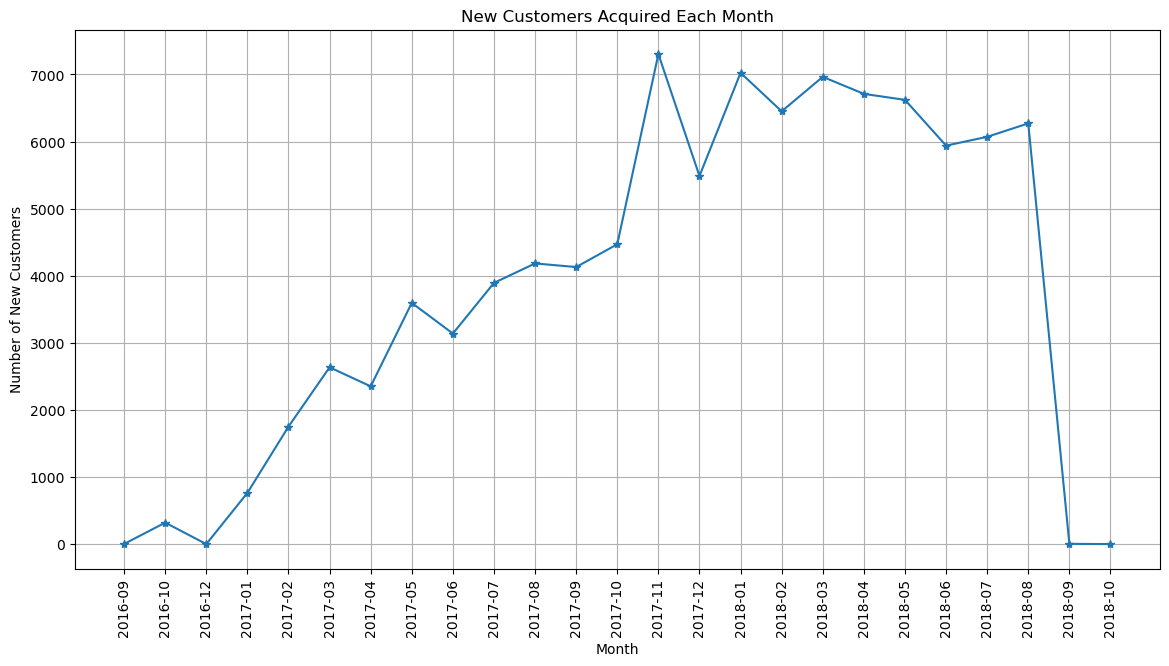

In [21]:
import matplotlib.pyplot as plt

# Plot the number of new customers acquired each month
plt.figure(figsize=(14, 7))
plt.plot(new_customers_per_month['Order Month'].astype(str), new_customers_per_month['New Customers'], marker='*')
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Number of New Customers')
plt.title('New Customers Acquired Each Month')
plt.grid(True)
plt.show()


#### c. Understand the retention of customers on month on month basis

In [23]:
monthly_customers = data.groupby('order_month')['customer_unique_id'].unique()
retention_rates = []
# Calculate the retention rate for each month
for i in range(1, len(monthly_customers)):
    current_month_customers = set(monthly_customers.iloc[i])
    previous_month_customers = set(monthly_customers.iloc[i - 1])
    retained_customers = len(current_month_customers.intersection(previous_month_customers))
    previous_month_total_customers = len(previous_month_customers)
    
    if previous_month_total_customers == 0:
        retention_rate = 0
    else:
        retention_rate = retained_customers / previous_month_total_customers
    
    retention_rates.append({
        'Month': monthly_customers.index[i],
        'Retention Rate': retention_rate
    })




In [24]:
retention_rates_df = pd.DataFrame(retention_rates)
print(retention_rates_df)


      Month  Retention Rate
0   2016-10        0.000000
1   2016-12        0.000000
2   2017-01        1.000000
3   2017-02        0.003922
4   2017-03        0.002279
5   2017-04        0.004921
6   2017-05        0.005902
7   2017-06        0.004966
8   2017-07        0.005346
9   2017-08        0.005827
10  2017-09        0.007772
11  2017-10        0.007597
12  2017-11        0.008112
13  2017-12        0.005518
14  2018-01        0.003391
15  2018-02        0.003907
16  2018-03        0.003958
17  2018-04        0.005060
18  2018-05        0.006539
19  2018-06        0.005724
20  2018-07        0.004243
21  2018-08        0.008026
22  2018-09        0.001238
23  2018-10        0.071429


In [25]:
data['order_purchase_timestamp'] = pd.to_datetime(data.order_purchase_timestamp, format = '%m/%d/%Y %H:%M')
data['Year_month'] = data.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x , format = "%Y-%m"))
cust_month = data.loc[:, ['customer_unique_id', 'Year_month']] 
cust_month.drop_duplicates(subset='customer_unique_id' , inplace= True)
cust_month

customer_unique_id Year_month
0       7c396fd4830fd04220f754e42b4e5bff    2017-10
3       af07308b275d755c9edb36a90c618231    2018-07
4       3a653a41f6f9fc3d2a113cf8398680e8    2018-08
5       7c142cf63193a1473d2e66489a9ae977    2017-11
6       72632f0f9dd73dfee390c9b22eb56dd6    2018-02
...                                  ...        ...
119142  6359f309b166b0196dbf7ad2ac62bb5a    2017-03
119143  da62f9e57a76d978d02ab5362c509660    2018-02
119144  737520a9aad80b3fbbdad19b66b37b30    2017-08
119145  5097a5312c8b157bb7be58ae360ef43c    2018-01
119147  60350aa974b26ff12caad89e55993bd6    2018-03

[96095 rows x 2 columns]

In [26]:
cust_monthly_cnt = cust_month.groupby('Year_month')[['customer_unique_id']].count().reset_index()
cust_monthly_cnt

Year_month  customer_unique_id
0     2016-09                   3
1     2016-10                 315
2     2016-12                   1
3     2017-01                 742
4     2017-02                1729
5     2017-03                2599
6     2017-04                2314
7     2017-05                3543
8     2017-06                3096
9     2017-07                3855
10    2017-08                4142
11    2017-09                4104
12    2017-10                4461
13    2017-11                7297
14    2017-12                5484
15    2018-01                7030
16    2018-02                6460
17    2018-03                6983
18    2018-04                6739
19    2018-05                6683
20    2018-06                6000
21    2018-07                6133
22    2018-08                6369
23    2018-09                  11
24    2018-10                   2

In [27]:
new_cust_monthly = data.groupby('Year_month')[['customer_unique_id']].count()
new_cust_monthly

customer_unique_id
Year_month                    
2016-09                      4
2016-10                    401
2016-12                      1
2017-01                   1030
2017-02                   2102
2017-03                   3226
2017-04                   2861
2017-05                   4458
2017-06                   3836
2017-07                   4877
2017-08                   5205
2017-09                   5140
2017-10                   5660
2017-11                   9137
2017-12                   6627
2018-01                   8612
2018-02                   8034
2018-03                   8575
2018-04                   8241
2018-05                   8201
2018-06                   7348
2018-07                   7352
2018-08                   7489
2018-09                     16
2018-10                      4

In [28]:
new_cust_monthly = data.groupby('Year_month')[['customer_unique_id']].count()
new_cust_monthly

customer_unique_id
Year_month                    
2016-09                      4
2016-10                    401
2016-12                      1
2017-01                   1030
2017-02                   2102
2017-03                   3226
2017-04                   2861
2017-05                   4458
2017-06                   3836
2017-07                   4877
2017-08                   5205
2017-09                   5140
2017-10                   5660
2017-11                   9137
2017-12                   6627
2018-01                   8612
2018-02                   8034
2018-03                   8575
2018-04                   8241
2018-05                   8201
2018-06                   7348
2018-07                   7352
2018-08                   7489
2018-09                     16
2018-10                      4

In [29]:
retented_cust_monthly = pd.merge(new_cust_monthly , cust_monthly_cnt , how= 'left' , on ="Year_month")
retented_cust_monthly
retented_cust_monthly['retented_cust'] = retented_cust_monthly.customer_unique_id_x - retented_cust_monthly.customer_unique_id_y
retented_cust_monthly

Year_month  customer_unique_id_x  customer_unique_id_y  retented_cust
0     2016-09                     4                     3              1
1     2016-10                   401                   315             86
2     2016-12                     1                     1              0
3     2017-01                  1030                   742            288
4     2017-02                  2102                  1729            373
5     2017-03                  3226                  2599            627
6     2017-04                  2861                  2314            547
7     2017-05                  4458                  3543            915
8     2017-06                  3836                  3096            740
9     2017-07                  4877                  3855           1022
10    2017-08                  5205                  4142           1063
11    2017-09                  5140                  4104           1036
12    2017-10                  5660                  4461           1199
13    2017-11                  9137                  7297           1840
14    2017-12                  6627                  5484           1143
15    2018-01                  8612                  7030           1582
16    2018-02                  8034                  6460           1574
17    2018-03                  8575                  6983           1592
18    2018-04                  8241                  6739           1502
19    2018-05                  8201                  6683           1518
20    2018-06                  7348                  6000           1348
21    2018-07                  7352                  6133           1219
22    2018-08                  7489                  6369           1120
23    2018-09                    16                    11              5
24    2018-10                     4                     2              2

C:\Users\ashut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ashut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


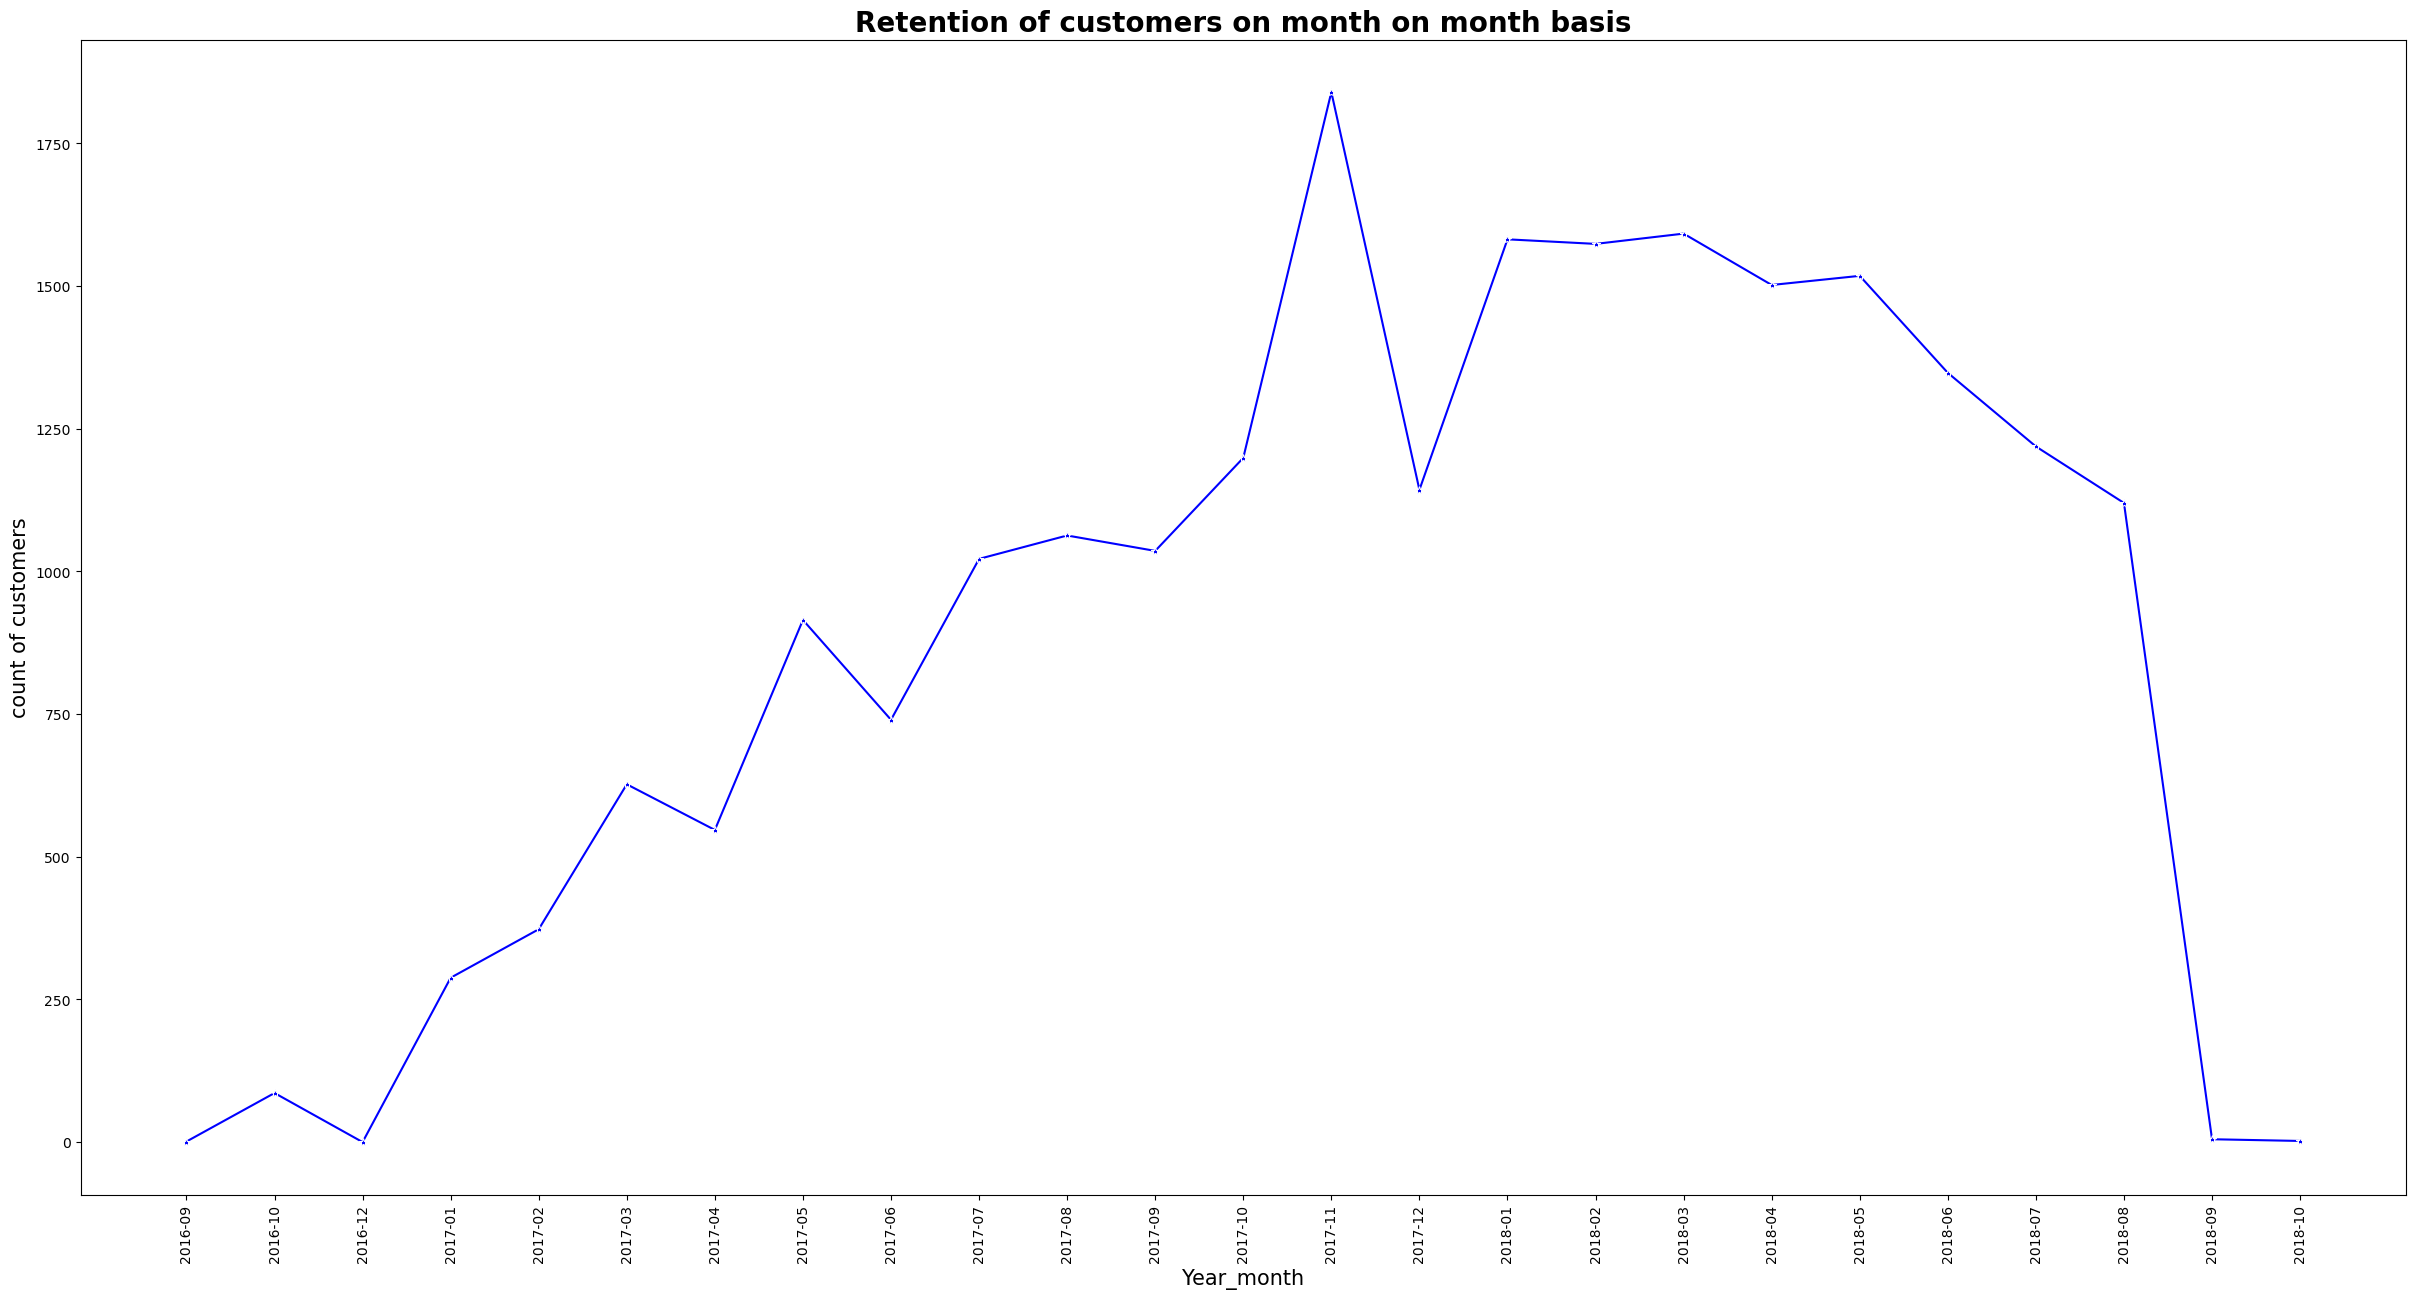

In [30]:
plt.figure(figsize=(30,15))
fig=sns.lineplot(data=retented_cust_monthly, x= 'Year_month' , y = 'retented_cust', color='blue', marker = '*')
plt.title('Retention of customers on month on month basis', fontweight='bold',fontsize=20)
plt.ylabel('count of customers',fontsize=15)
plt.xlabel('Year_month',fontsize=15)
plt.xticks(rotation=90)
plt.show()

#### d. How the revenues from existing/new customers on month on month basis

In [32]:
mon=data.groupby(data.order_month).payment_value.sum().reset_index()
mon

order_month  payment_value
0      2016-09         388.47
1      2016-10       76959.13
2      2016-12          19.62
3      2017-01      190366.65
4      2017-02      351230.24
5      2017-03      547556.71
6      2017-04      511767.50
7      2017-05      735983.08
8      2017-06      613152.67
9      2017-07      746440.01
10     2017-08      883152.91
11     2017-09     1028250.28
12     2017-10     1045030.83
13     2017-11     1609278.22
14     2017-12     1060215.53
15     2018-01     1423186.34
16     2018-02     1327322.09
17     2018-03     1485660.09
18     2018-04     1499457.60
19     2018-05     1510624.12
20     2018-06     1297978.62
21     2018-07     1361660.87
22     2018-08     1247055.83
23     2018-09        4439.54
24     2018-10         589.67

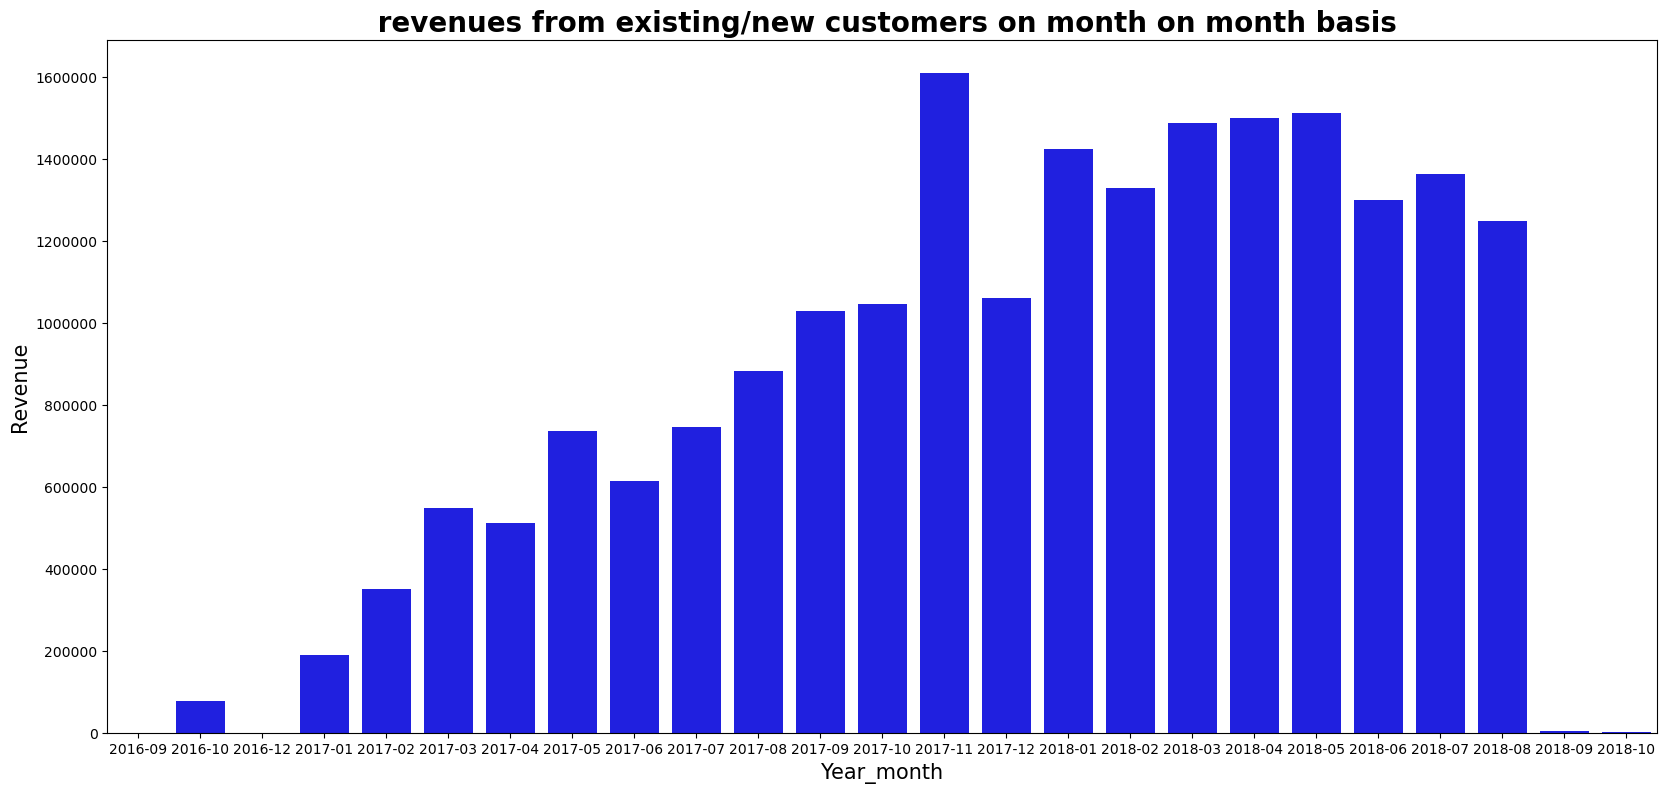

In [33]:
plt.figure(figsize=(20,9))
fig=sns.barplot(data=mon, x='order_month', y='payment_value', color='blue' )
plt.title(' revenues from existing/new customers on month on month basis', fontweight='bold',fontsize=20)
plt.xlabel('Year_month',fontsize=15)
plt.ylabel('Revenue',fontsize=15)
plt.ticklabel_format(style='plain',axis='y')
plt.show()

#### e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

In [35]:
data['yearweek']=data.order_purchase_timestamp.apply( lambda x: pd.Timestamp.strftime(x, format= '%Y%V'))
wkkk=data.groupby(data.yearweek).payment_value.sum().reset_index()
wkkk

yearweek  payment_value
0     201635         272.46
1     201636          75.06
2     201637          40.95
3     201639         109.34
4     201640       71260.56
..       ...            ...
96    201837         808.46
97    201838         276.04
98    201839         453.20
99    201840         277.93
100   201842         311.74

[101 rows x 2 columns]

C:\Users\ashut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ashut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


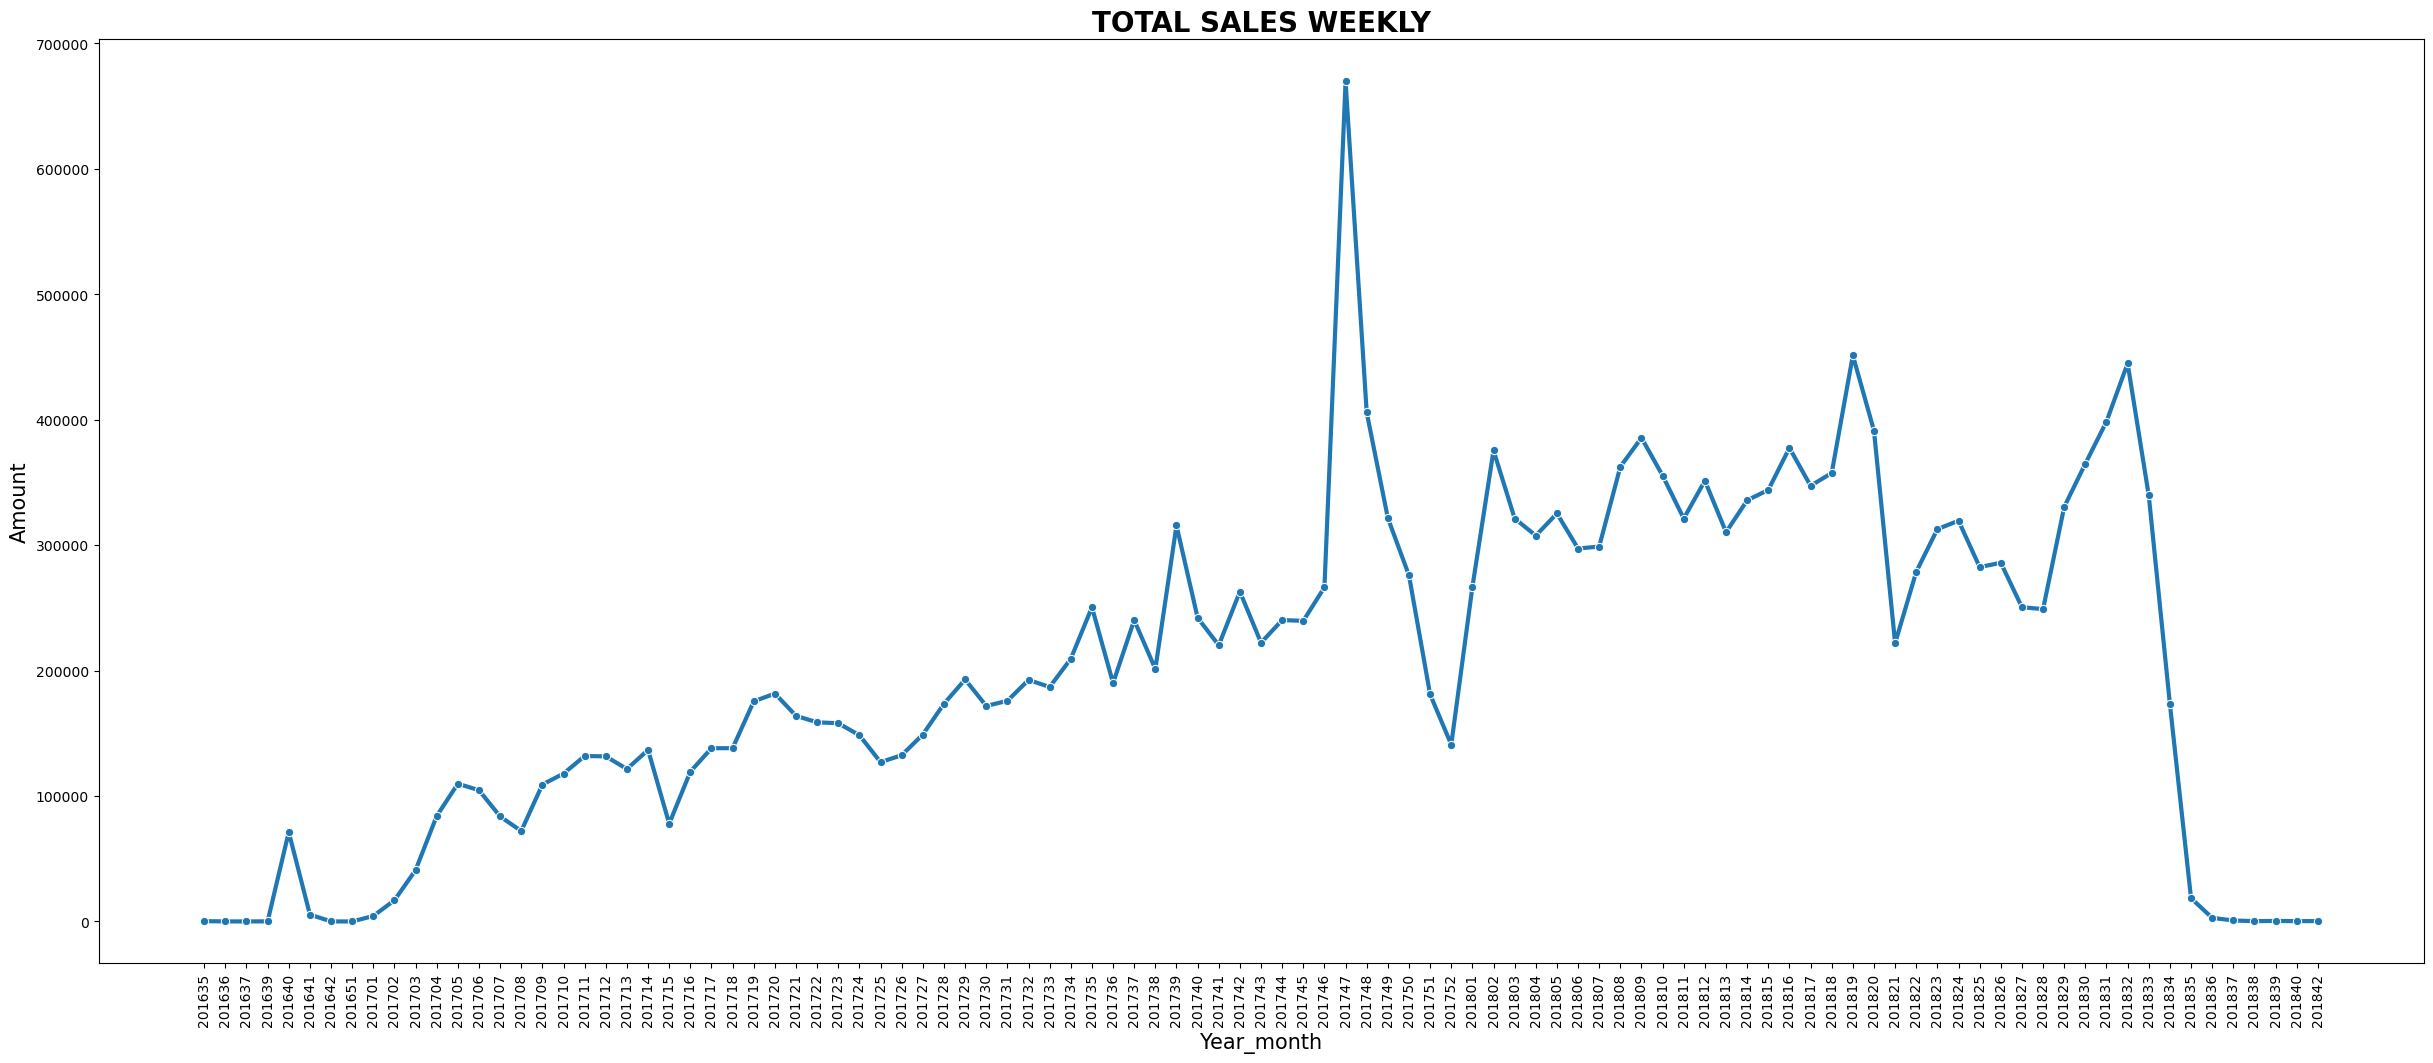

In [36]:
plt.figure(figsize=(30,12))
sns.lineplot(data=wkkk, x='yearweek', y='payment_value', marker="o",linewidth=3)
plt.title('TOTAL SALES WEEKLY', fontweight='bold',fontsize=20)
plt.xlabel('Year_month',fontsize=15)
plt.ylabel('Amount',fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [37]:
# now we'll try to do the day part
data['yearday']=data.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x, format='%Y%d'))
dyy=data.groupby(data.yearday).payment_value.sum().reset_index()
dyy

yearday  payment_value
0   201602         109.34
1   201603         595.14
2   201604       14347.77
3   201605       16374.63
4   201606       11645.27
..     ...            ...
69  201827      331006.84
70  201828      311749.07
71  201829      226559.69
72  201830      251849.75
73  201831      196401.74

[74 rows x 2 columns]

C:\Users\ashut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ashut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


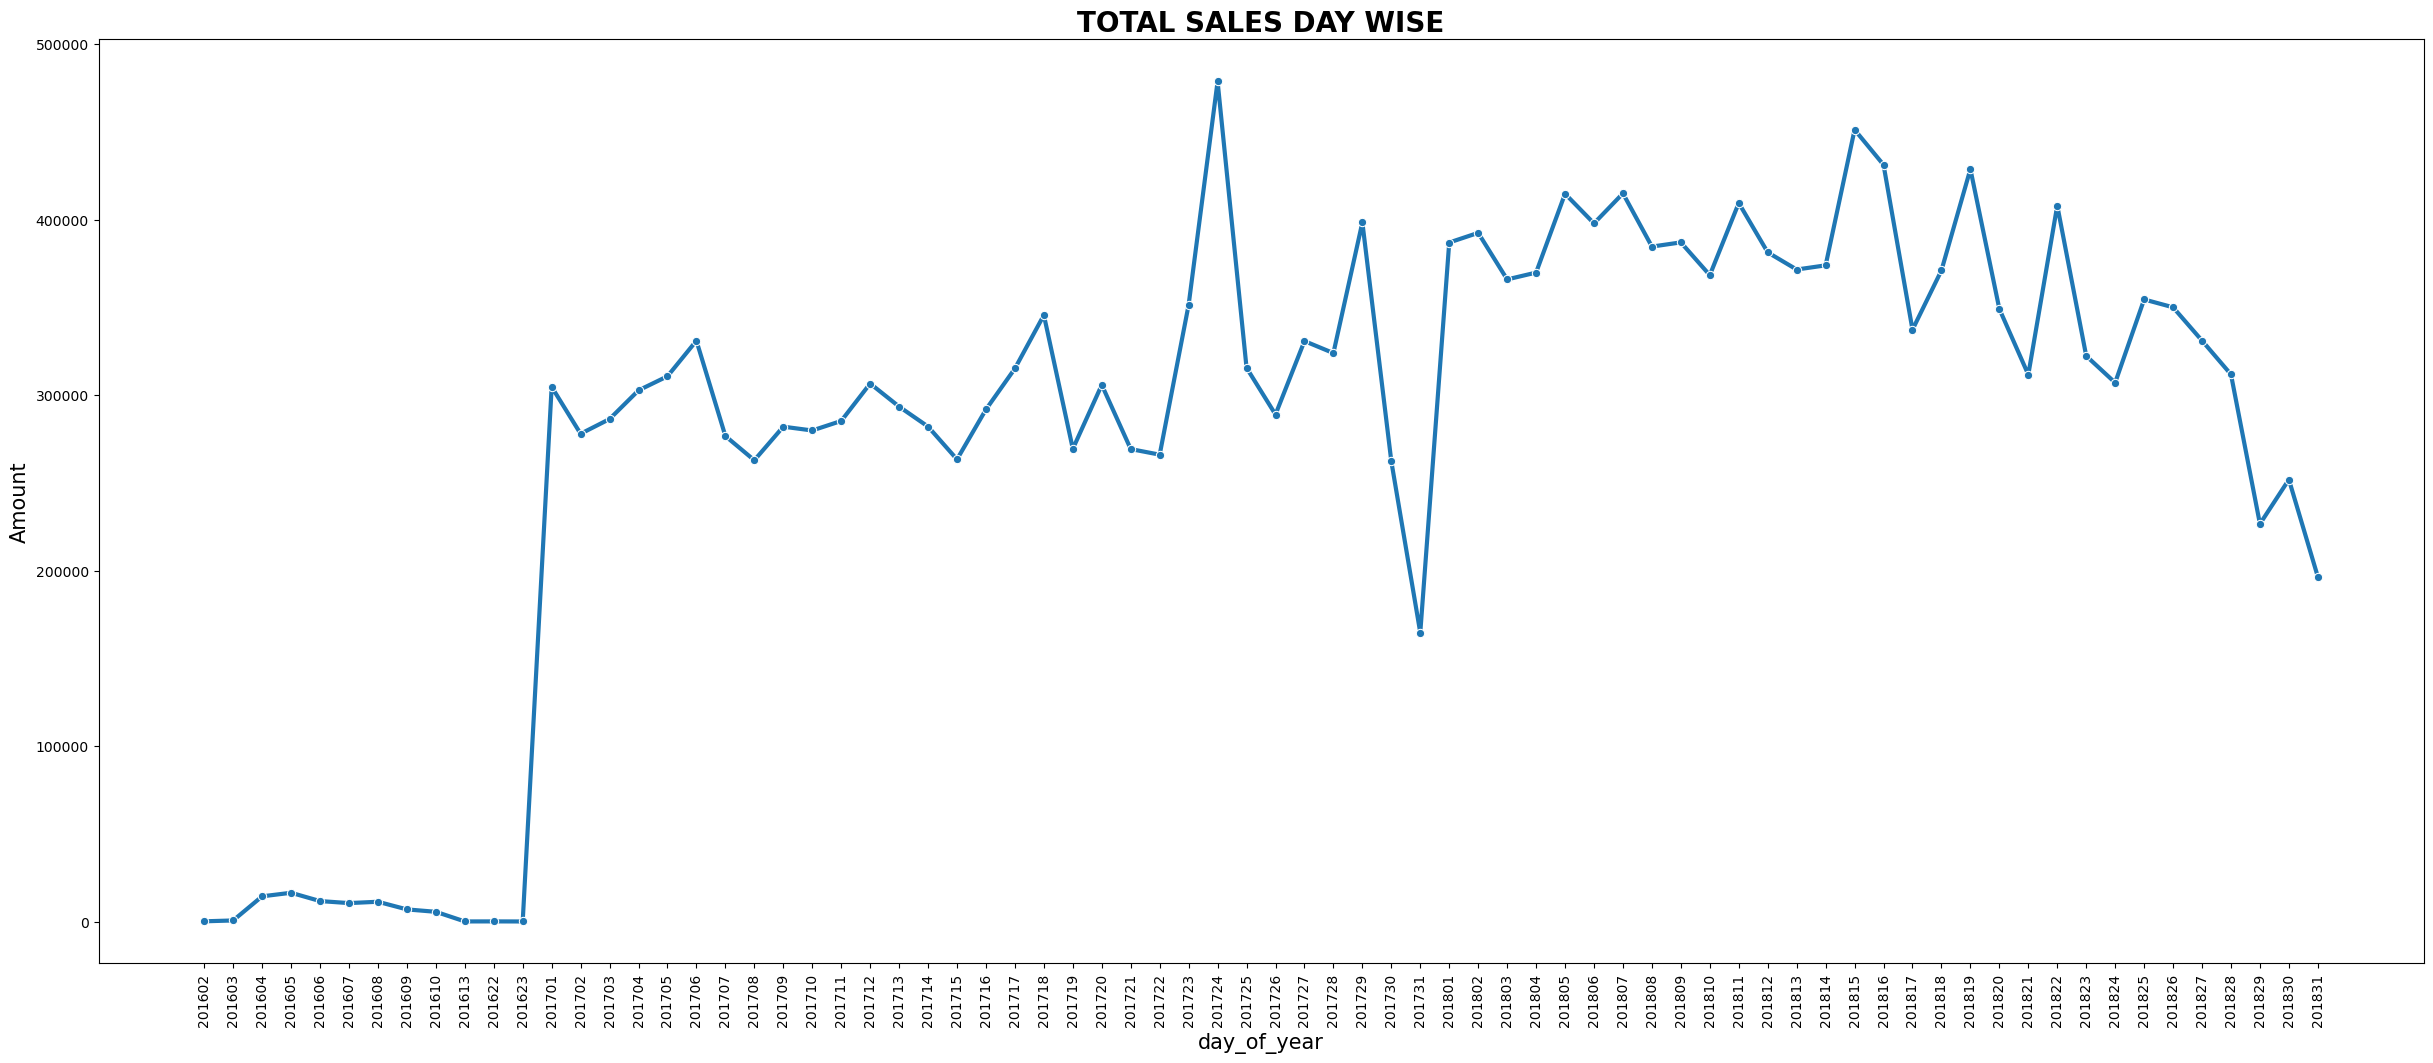

In [38]:
plt.figure(figsize=(30,12))
sns.lineplot(data=dyy, x='yearday', y='payment_value', marker="o",linewidth=3)
plt.title('TOTAL SALES DAY WISE', fontweight='bold',fontsize=20)
plt.xlabel('day_of_year',fontsize=15)
plt.ylabel('Amount',fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [39]:
#Now we've to find total sales by category
qty_by_cat=data.groupby(by='product_category_name').order_id.count().reset_index()
qty_by_cat

product_category_name  order_id
0   Agro_Industry_And_Commerce       249
1             Air_Conditioning       302
2                          Art       219
3        Arts_And_Craftmanship        24
4                        Audio       379
..                         ...       ...
66                  Stationery      2595
67      Tablets_Printing_Image        87
68                   Telephony      4697
69                        Toys      4259
70               Watches_Gifts      6186

[71 rows x 2 columns]

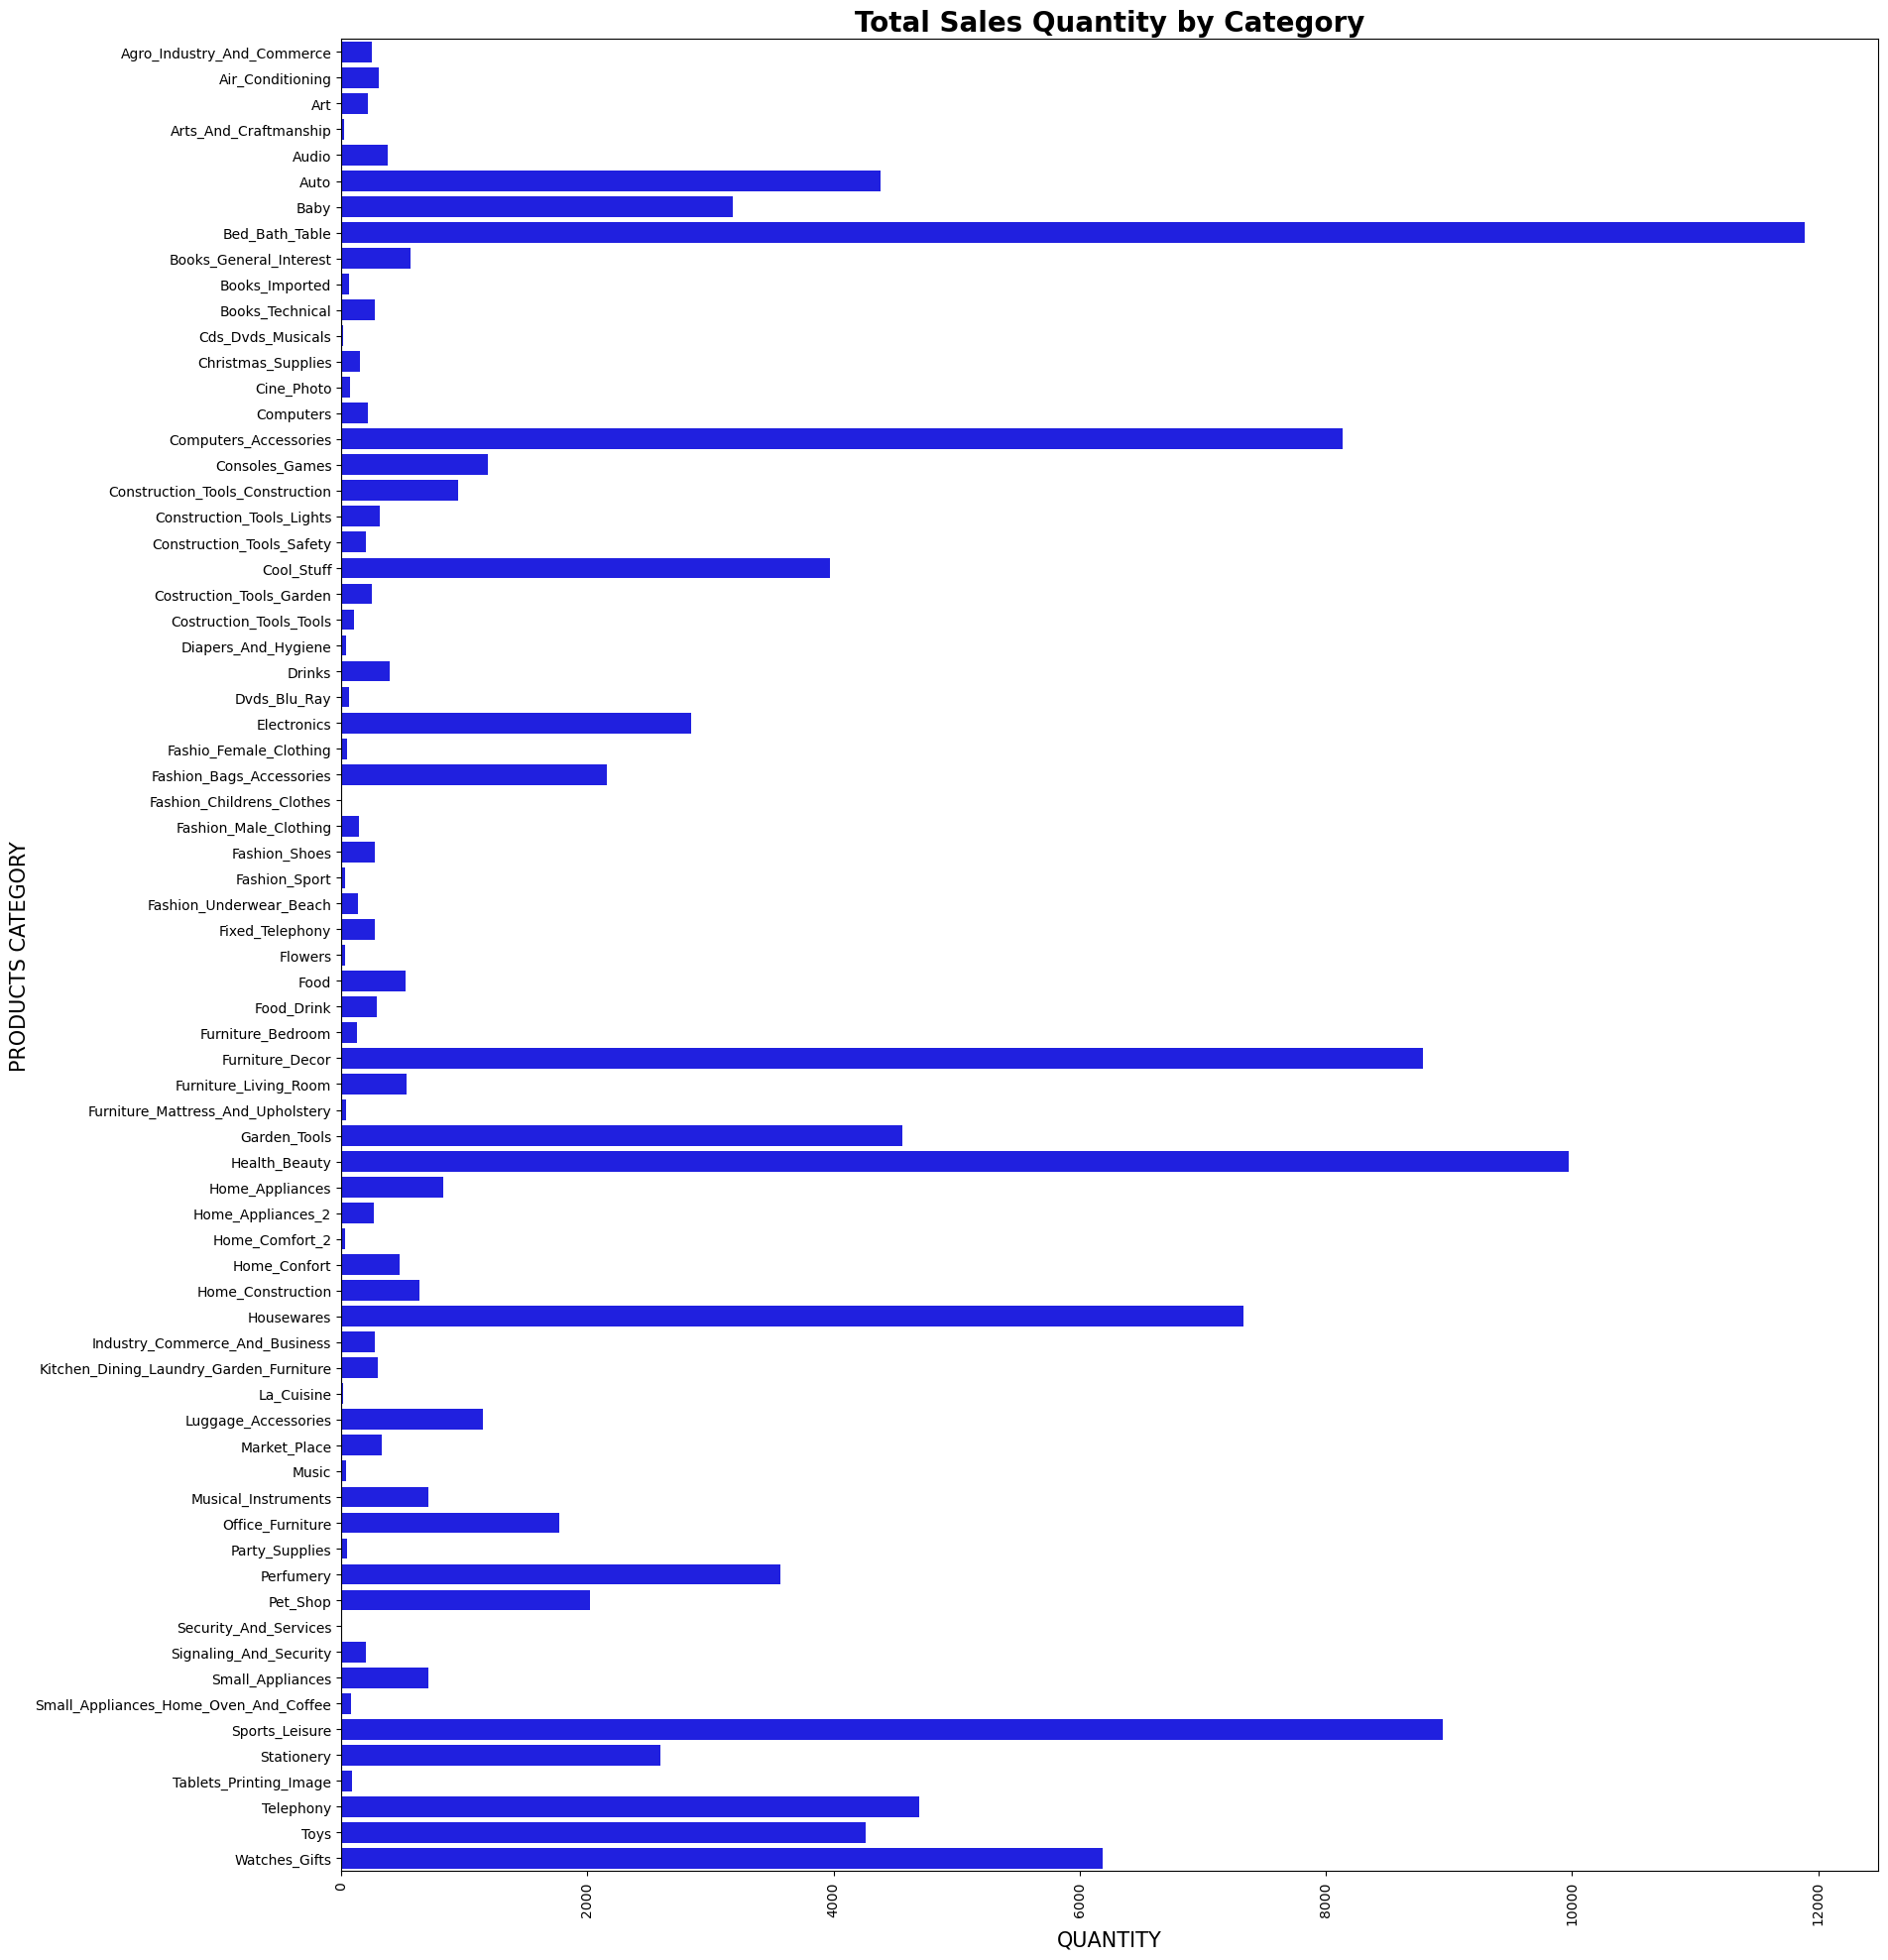

In [40]:
plt.figure(figsize=(20,24))
fig=sns.barplot(data=qty_by_cat, y='product_category_name', x='order_id', color='blue' )
plt.title('Total Sales Quantity by Category', fontweight='bold',fontsize=20)
plt.tick_params(axis="x", labelrotation=90)
plt.xlabel('QUANTITY',fontsize=15)
plt.ylabel('PRODUCTS CATEGORY',fontsize=15)
plt.show()

In [41]:
#Now we've to find total sales by location
qty_loc=data.groupby(data.customer_state).product_id.count().reset_index()
qty_loc

customer_state  product_id
0      Andhra Pradesh       72306
1   Arunachal Pradesh        1319
2        Chhattisgarh        7390
3               Delhi        3920
4                 Goa          10
5             Gujarat        8838
6             Haryana        2614
7    Himachal Pradesh         862
8     Jammu & Kashmir        1822
9           Karnataka        4535
10             Kerala        1767
11     Madhya Pradesh        3356
12        Maharashtra        2320
13             Orissa         697
14             Punjab         770
15          Rajasthan         923
16         Tamil Nadu        2458
17      Uttar Pradesh        1179
18        Uttaranchal         110
19        West Bengal         427

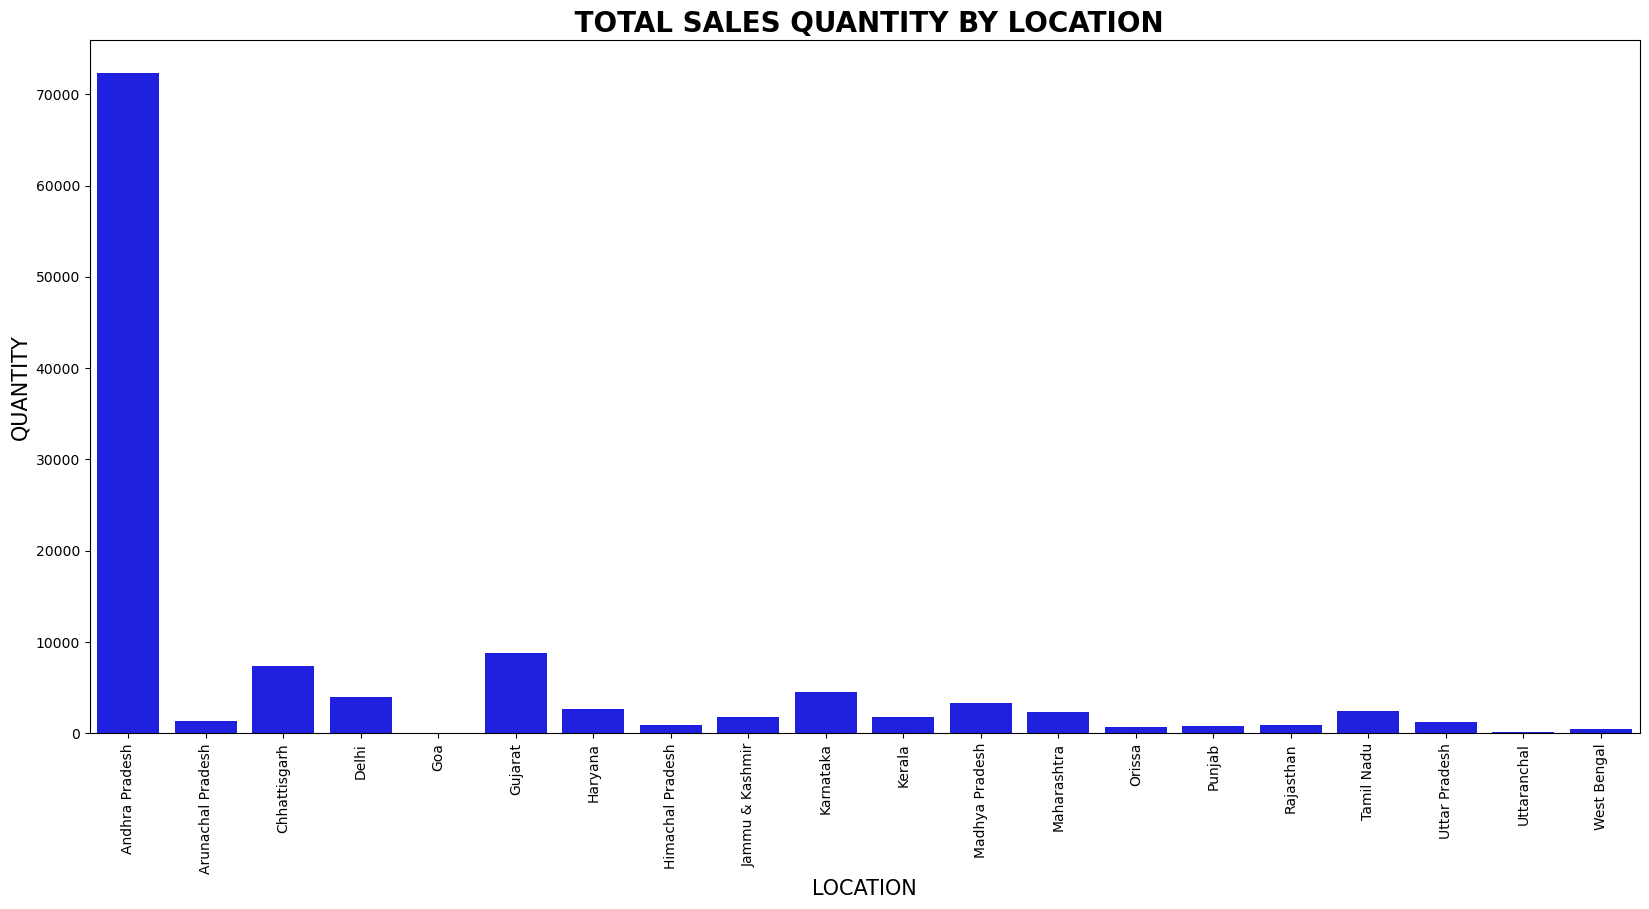

In [42]:
plt.figure(figsize=(20,9))
fig=sns.barplot(data=qty_loc, x='customer_state', y='product_id', color='blue' )
plt.title(' TOTAL SALES QUANTITY BY LOCATION', fontweight='bold',fontsize=20)
plt.xlabel('LOCATION',fontsize=15)
plt.ylabel('QUANTITY',fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [43]:
#Now we've to find total sales quantity by month wise
qty_month=data.groupby(data.order_month).product_id.count().reset_index()
qty_month

order_month  product_id
0      2016-09           3
1      2016-10         385
2      2016-12           1
3      2017-01        1018
4      2017-02        2052
5      2017-03        3184
6      2017-04        2847
7      2017-05        4418
8      2017-06        3805
9      2017-07        4817
10     2017-08        5162
11     2017-09        5090
12     2017-10        5594
13     2017-11        9042
14     2017-12        6575
15     2018-01        8560
16     2018-02        7999
17     2018-03        8552
18     2018-04        8236
19     2018-05        8180
20     2018-06        7341
21     2018-07        7332
22     2018-08        7429
23     2018-09           1
24     2018-10           0

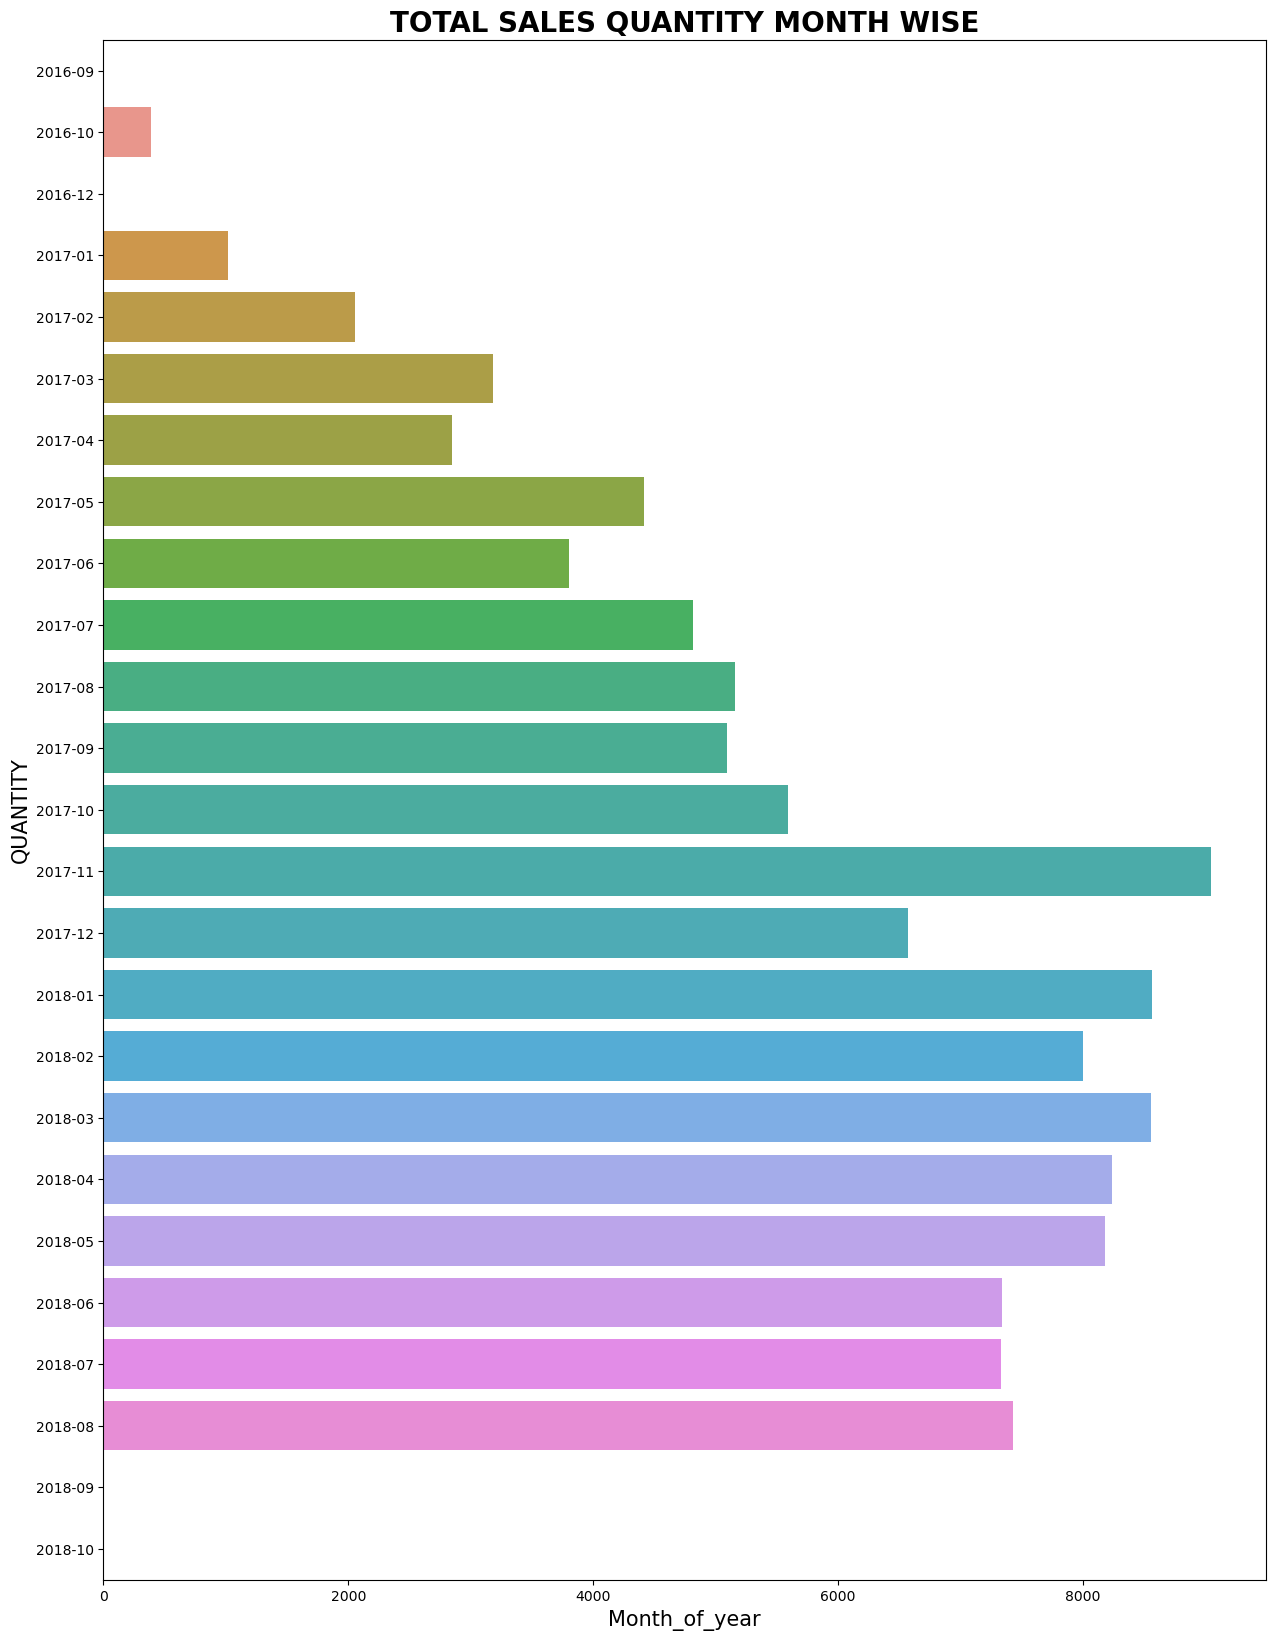

In [44]:
plt.figure(figsize=(15,20))
sns.barplot(data=qty_month, y='order_month', x='product_id',linewidth=3,orient ='h')
plt.title('TOTAL SALES QUANTITY MONTH WISE', fontweight='bold',fontsize=20)
plt.xlabel('Month_of_year',fontsize=15)
plt.ylabel('QUANTITY',fontsize=15)
plt.show()

In [45]:
#Now we've to find total sales quantity by week wise
qty_weekly=data.groupby(data.yearweek).product_id.count().reset_index()
qty_weekly

yearweek  product_id
0     201635           2
1     201636           1
2     201637           0
3     201639           1
4     201640         337
..       ...         ...
96    201837           0
97    201838           0
98    201839           0
99    201840           0
100   201842           0

[101 rows x 2 columns]

C:\Users\ashut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ashut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


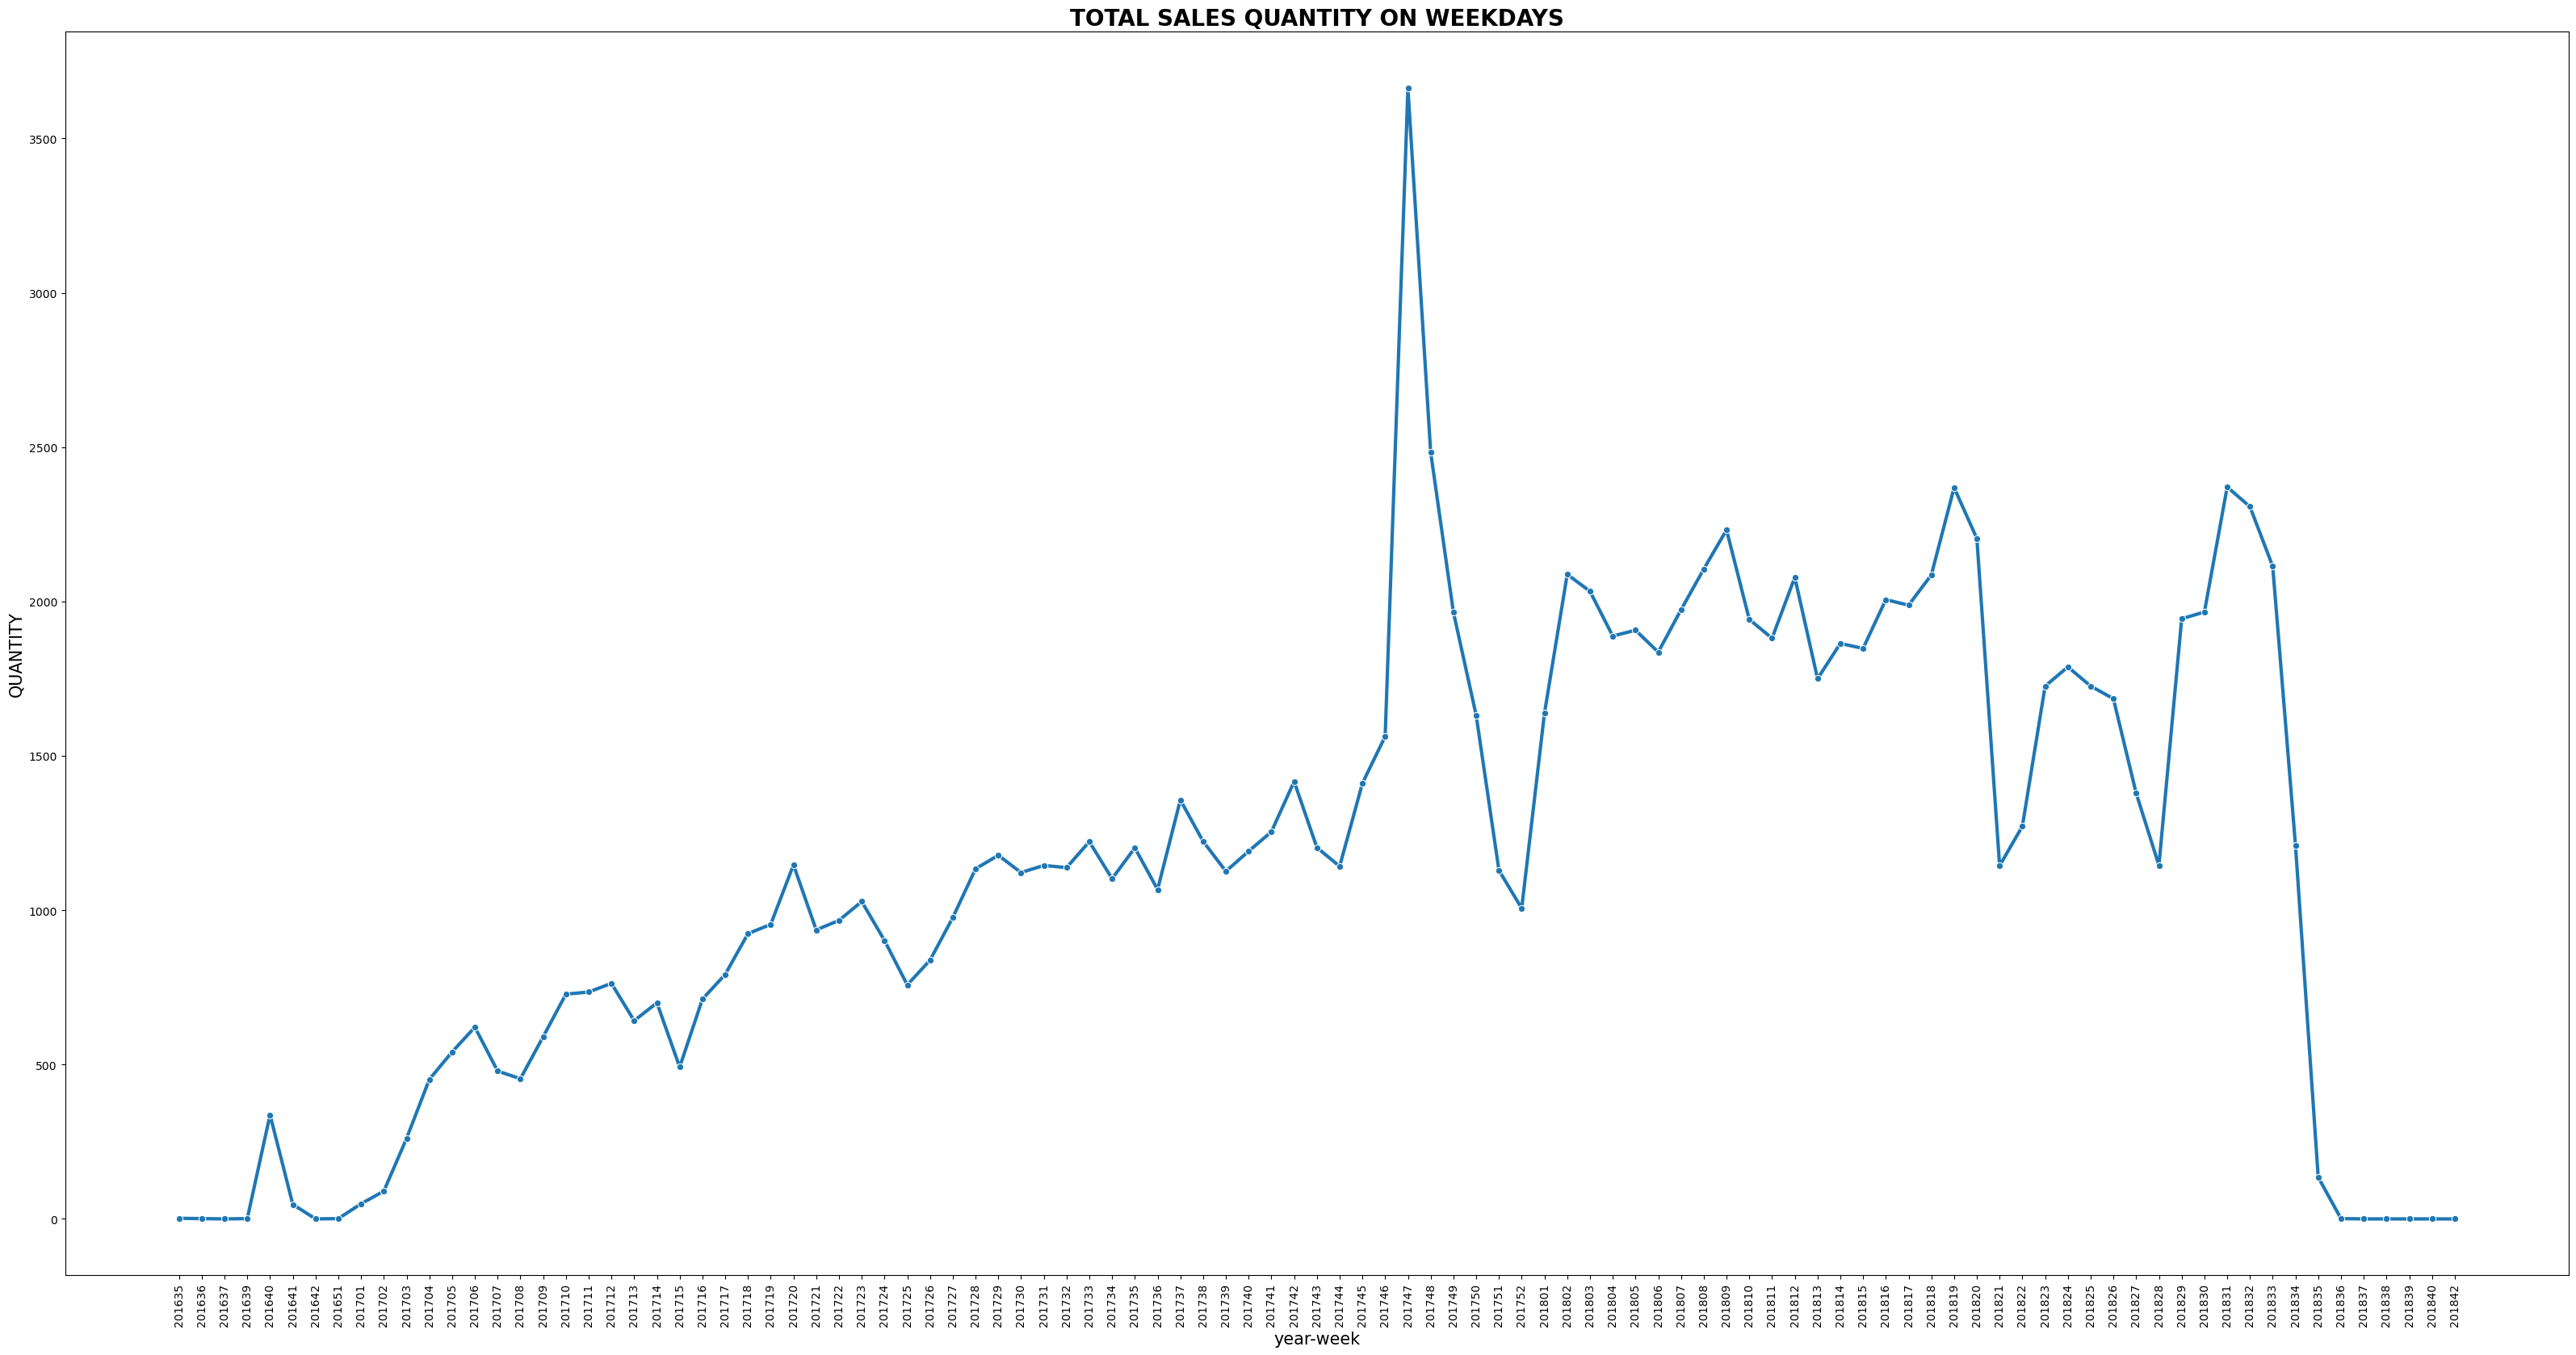

In [46]:
plt.figure(figsize=(40,20))
sns.lineplot(data=qty_weekly, x='yearweek', y='product_id', marker="o",linewidth=3)
plt.title('TOTAL SALES QUANTITY ON WEEKDAYS', fontweight='bold',fontsize=20)
plt.xlabel('year-week',fontsize=15)
plt.ylabel('QUANTITY',fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [47]:
#Now we've to find total sales quantity by day of month wise
qty_monthday=data.groupby(data.yearday).product_id.count().reset_index()
qty_monthday

yearday  product_id
0   201602           1
1   201603           8
2   201604          78
3   201605          60
4   201606          58
..     ...         ...
69  201827        1834
70  201828        1729
71  201829        1346
72  201830        1427
73  201831        1031

[74 rows x 2 columns]

C:\Users\ashut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ashut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


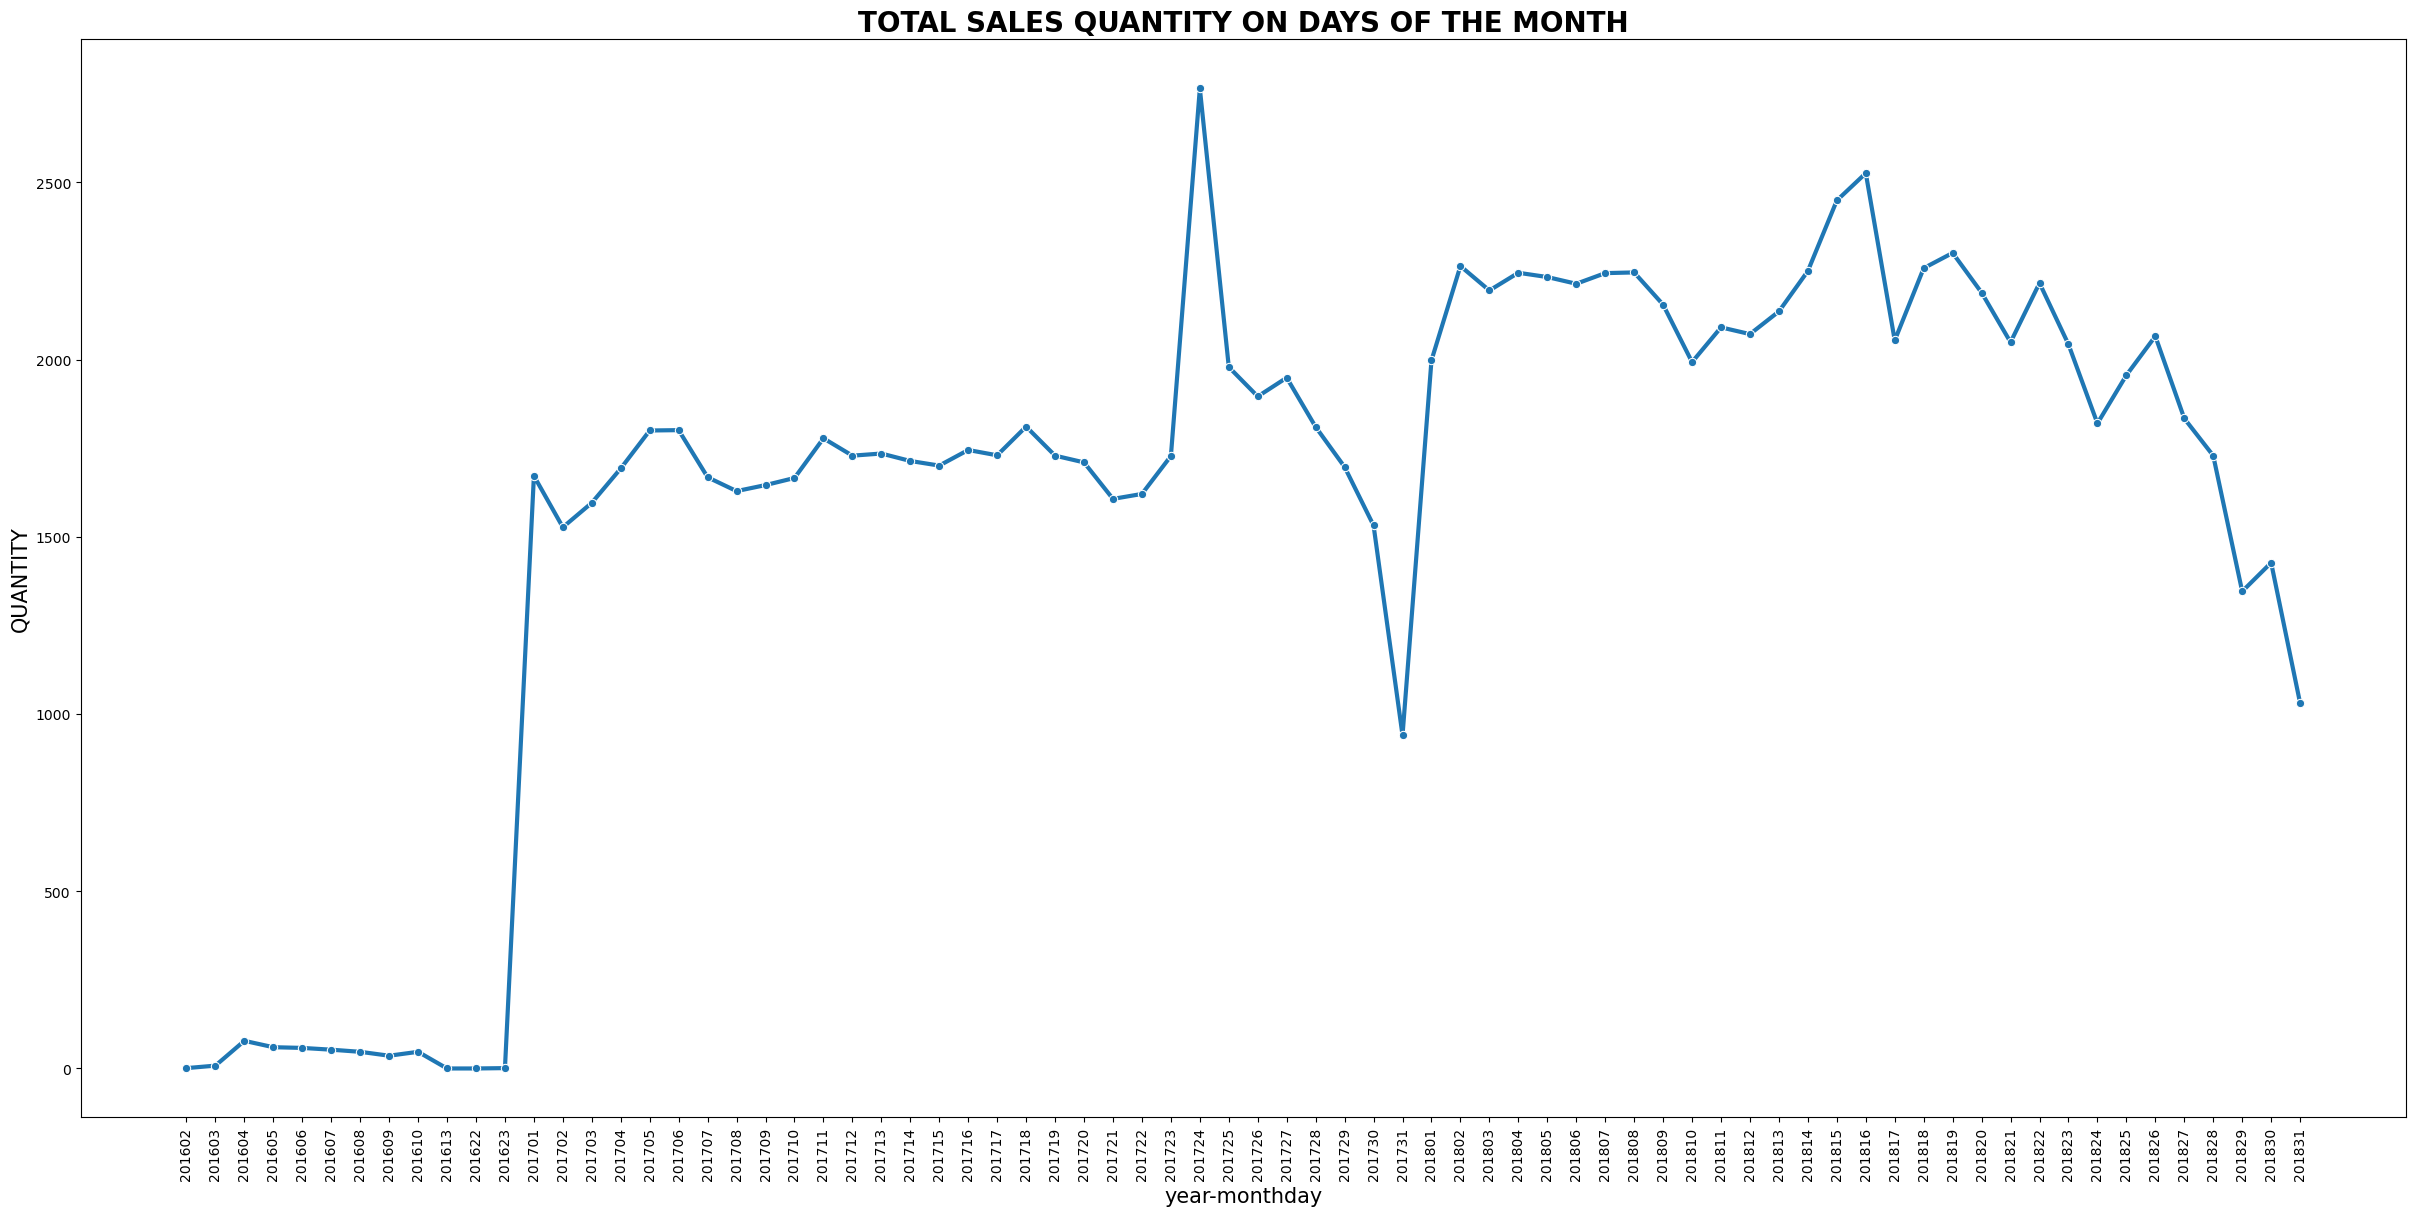

In [48]:
plt.figure(figsize=(30,14))
sns.lineplot(data=qty_monthday, x='yearday', y='product_id', marker="o",linewidth=3)
plt.title('TOTAL SALES QUANTITY ON DAYS OF THE MONTH', fontweight='bold',fontsize=20)
plt.xlabel('year-monthday',fontsize=15)
plt.ylabel('QUANTITY',fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [49]:
#Now we've to find total sales quantity by payment type
f1=data.groupby(data.payment_type).product_id.count().reset_index()
f1

payment_type  product_id
0          UPI       23018
1  credit_card       87243
2   debit_card        1699
3  not_defined           0
4      voucher        5663

<function matplotlib.pyplot.show(close=None, block=None)>

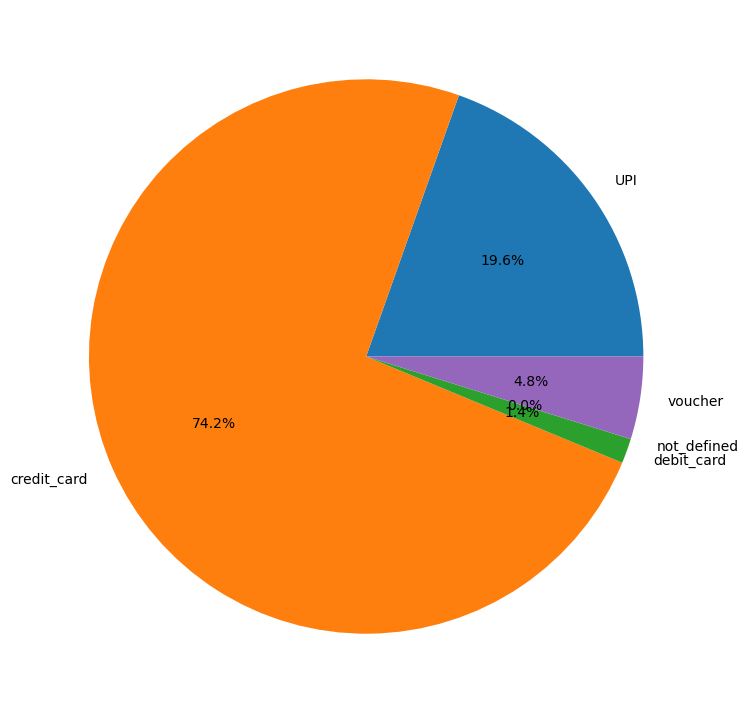

In [50]:
plt.figure(figsize=(15,9))
plt.pie(data= f1, x= 'product_id', labels='payment_type', autopct="%1.1f%%")
plt.show

#### f. Popular Products by month, seller, state, category.

In [52]:
## by month
p=data[['order_month','product_id', 'order_id']].groupby(['order_month','product_id']).aggregate('count').reset_index()
p=p.sort_values(['order_month','order_id' ], ascending=[True, False]).drop_duplicates('order_month').reset_index().drop("index",axis=1)
p

order_month                        product_id  order_id
0      2016-09  c1488892604e4ba5cff5b4eb4d595400         1
1      2016-10  eba7488e1c67729f045ab43fac426f2e        11
2      2016-12  f5d8f4fbc70ca2a0038b9a0010ed5cb0         1
3      2017-01  37eb69aca8718e843d897aa7b82f462d        15
4      2017-02  a703f5ade6e4fae527357132230ea778        13
5      2017-03  7e0dc102074f8285580c9777f79c90cf        45
6      2017-04  99a4788cb24856965c36a24e339b6058        38
7      2017-05  99a4788cb24856965c36a24e339b6058        66
8      2017-06  42a2c92a0979a949ca4ea89ec5c7b934        73
9      2017-07  f1c7f353075ce59d8a6f3cf58f419c9c        63
10     2017-08  f1c7f353075ce59d8a6f3cf58f419c9c        53
11     2017-09  422879e10f46682990de24d770e7f83d        38
12     2017-10  422879e10f46682990de24d770e7f83d        42
13     2017-11  422879e10f46682990de24d770e7f83d        96
14     2017-12  422879e10f46682990de24d770e7f83d        55
15     2018-01  aca2eb7d00ea1a7b8ebd4e68314663af       124
16     2018-02  3dd2a17168ec895c781a9191c1e95ad7        72
17     2018-03  aca2eb7d00ea1a7b8ebd4e68314663af        65
18     2018-04  53b36df67ebb7c41585e8d54d6772e08        86
19     2018-05  53b36df67ebb7c41585e8d54d6772e08       115
20     2018-06  19c91ef95d509ea33eda93495c4d3481        43
21     2018-07  d285360f29ac7fd97640bf0baef03de0        47
22     2018-08  e7cc48a9daff5436f63d3aad9426f28b        70
23     2018-09  b98992ea80b467987a7fbb88e7f2076a         1

In [53]:
px.bar(p, x='order_month', y='order_id', color= 'product_id')

TypeError: Object of type Period is not JSON serializable

TypeError: Object of type Period is not JSON serializable

TypeError: Object of type Period is not JSON serializable

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': ('product_id=c1488892604e4ba5cff' ... 'r>order_id=%{y}<extra></extra>'),
              'legendgroup': 'c1488892604e4ba5cff5b4eb4d595400',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'c1488892604e4ba5cff5b4eb4d595400',
              'offsetgroup': 'c1488892604e4ba5cff5b4eb4d595400',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([Period('2016-09', 'M')], dtype=object),
              'xaxis': 'x',
              'y': array([1], dtype=int64),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': ('product_id=eba7488e1c67729f045' ... 'r>order_id=%{y}<extra></extra>'),
              'legendgroup': 'eba7488e1c67729f045ab43fac426f2e',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
    

In [54]:
## by state
state=data[['customer_state', 'product_id','order_id']].groupby(['customer_state','product_id' ]).aggregate('count').reset_index()
state=state.sort_values(['customer_state', 'order_id'], ascending=[True, False]).drop_duplicates('customer_state')
state

customer_state                        product_id  order_id
16353     Andhra Pradesh  aca2eb7d00ea1a7b8ebd4e68314663af       346
24307  Arunachal Pradesh  03e1c946c0ddfc58724ff262aef08dff        12
26503       Chhattisgarh  422879e10f46682990de24d770e7f83d        41
30802              Delhi  53759a2ecddad2bb87a079a1f1519f73        24
32584                Goa  2a5806f10d0f00e5ad032dd2e3c8806e         1
36062            Gujarat  aca2eb7d00ea1a7b8ebd4e68314663af        50
38231            Haryana  35afc973633aaeb6b877ff57b2793310        15
39873   Himachal Pradesh  422879e10f46682990de24d770e7f83d         6
41114    Jammu & Kashmir  89b190a046022486c635022524a974a8        15
42520          Karnataka  422879e10f46682990de24d770e7f83d        25
45661             Kerala  aca2eb7d00ea1a7b8ebd4e68314663af        13
48024     Madhya Pradesh  d1c427060a0f73f6b889a5c7c61f2ac4        25
49461        Maharashtra  99a4788cb24856965c36a24e339b6058        13
50532             Orissa  aca2eb7d00ea1a7b8ebd4e68314663af         7
50951             Punjab  60ee9861f35c13d4a3a2bc10e86bb05b        10
51508          Rajasthan  368c6c730842d78016ad823897a372db         7
53138         Tamil Nadu  99a4788cb24856965c36a24e339b6058        13
53888      Uttar Pradesh  12d4987d54a76e89154609f0314b0f2f         8
54789        Uttaranchal  53759a2ecddad2bb87a079a1f1519f73         3
55074        West Bengal  99a4788cb24856965c36a24e339b6058         6

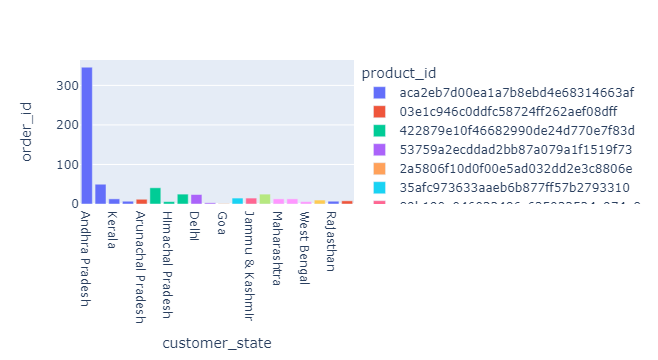

In [55]:
px.bar(state, x='customer_state', color='product_id' ,y='order_id')

In [56]:
#.seller_city
o=data[['seller_city','product_id','order_id']].groupby(['seller_city','product_id']).aggregate('count').reset_index()
o=o.sort_values(['seller_city','order_id'], ascending=[True, False]).drop_duplicates('seller_city')
# o=o[o.order_id>10]
o

seller_city                        product_id  order_id
0         Aadityana  72bf8fd8b4596a7fa2c2cfab031204ed         1
9        Aarambhada  7e6850f360e60da72b7d3b1b37f42312         7
15          Achabal  a48a82499de633cdd782856d69789b62         1
17           Adalaj  4e5dc46fe4e31dd605f374ee43f0268e        10
144        Adilabad  8c292ca193d326152e335d77176746f0        92
...             ...                               ...       ...
33346      Yellandu  4618f9c46ea4592eccee4a62718e1560         2
33355    Yemmiganur  304104a478e3a605db6072a22e4ee228        12
33512     Zahirabad  fbce4c4cb307679d89a3bf3d3bb353b9        63
33515  Ziauddin Pur  08574b074924071f4e201e151b152b4e       115
33535          Ziro  ddc01db3147c02cb8f547ac87da1718f         3

[534 rows x 3 columns]

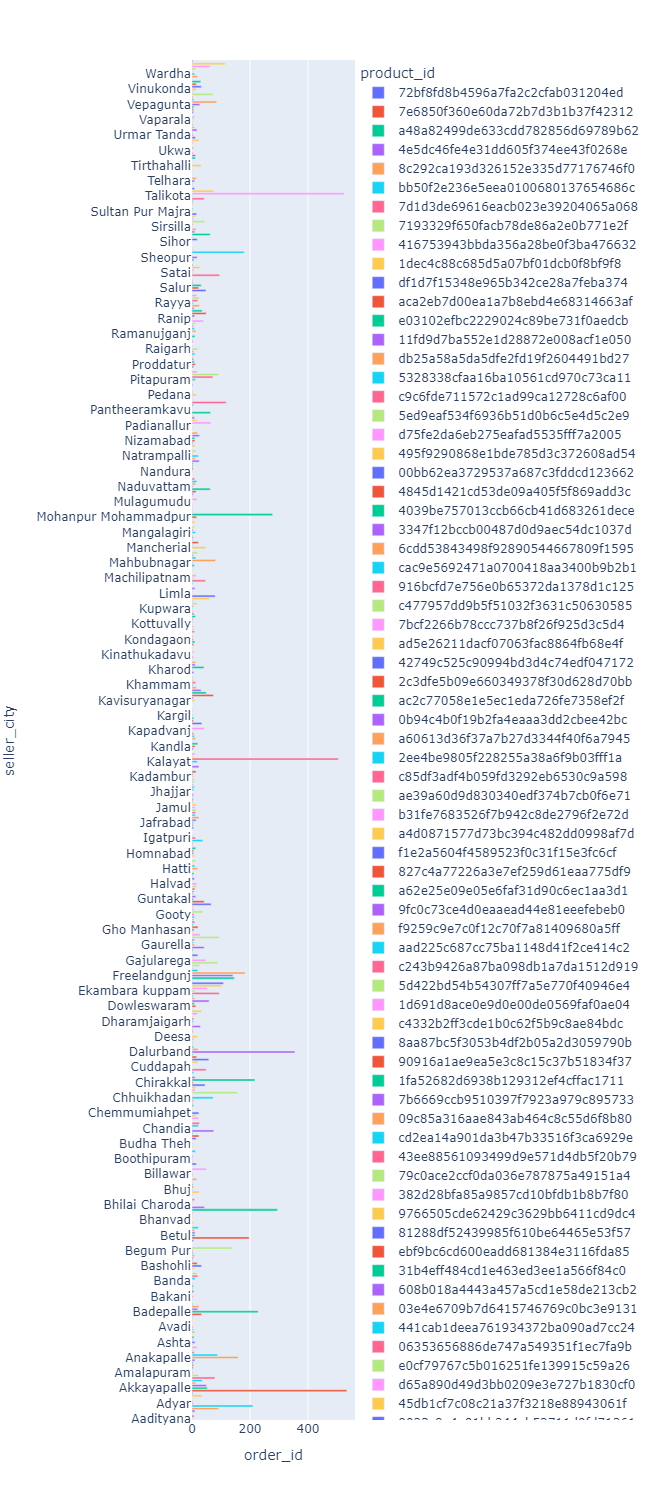

In [57]:
px.bar(o, x='order_id', y='seller_city', color='product_id',height= 1500)

In [58]:
#by product_category
category=data[['product_category_name', 'product_id','order_id']].groupby(['product_category_name', 'product_id']).aggregate('count').reset_index()
category=category.sort_values(['product_category_name','order_id'], ascending=[True, False]).drop_duplicates('product_category_name')
category

product_category_name                        product_id  order_id
7      Agro_Industry_And_Commerce  11250b0d4b709fee92441c5f34122aed        44
144              Air_Conditioning  98e91d0f32954dcd8505875bb2b42cdb        17
218                           Art  4fe644d766c7566dbc46fb851363cb3b       109
267         Arts_And_Craftmanship  b9976e9c22fb1540bd71d1bcd2989475         5
316                         Audio  db5efde3ad0cc579b130d71c4b2db522        50
...                           ...                               ...       ...
28426                  Stationery  fb55982be901439613a95940feefd9ee        85
28449      Tablets_Printing_Image  6bbe55cf8f85c87b6eebb775a53402f4        35
29470                   Telephony  e7cc48a9daff5436f63d3aad9426f28b        95
30360                        Toys  880be32f4db1d9f6e2bec38fb6ac23ab       106
31448               Watches_Gifts  53b36df67ebb7c41585e8d54d6772e08       327

[71 rows x 3 columns]

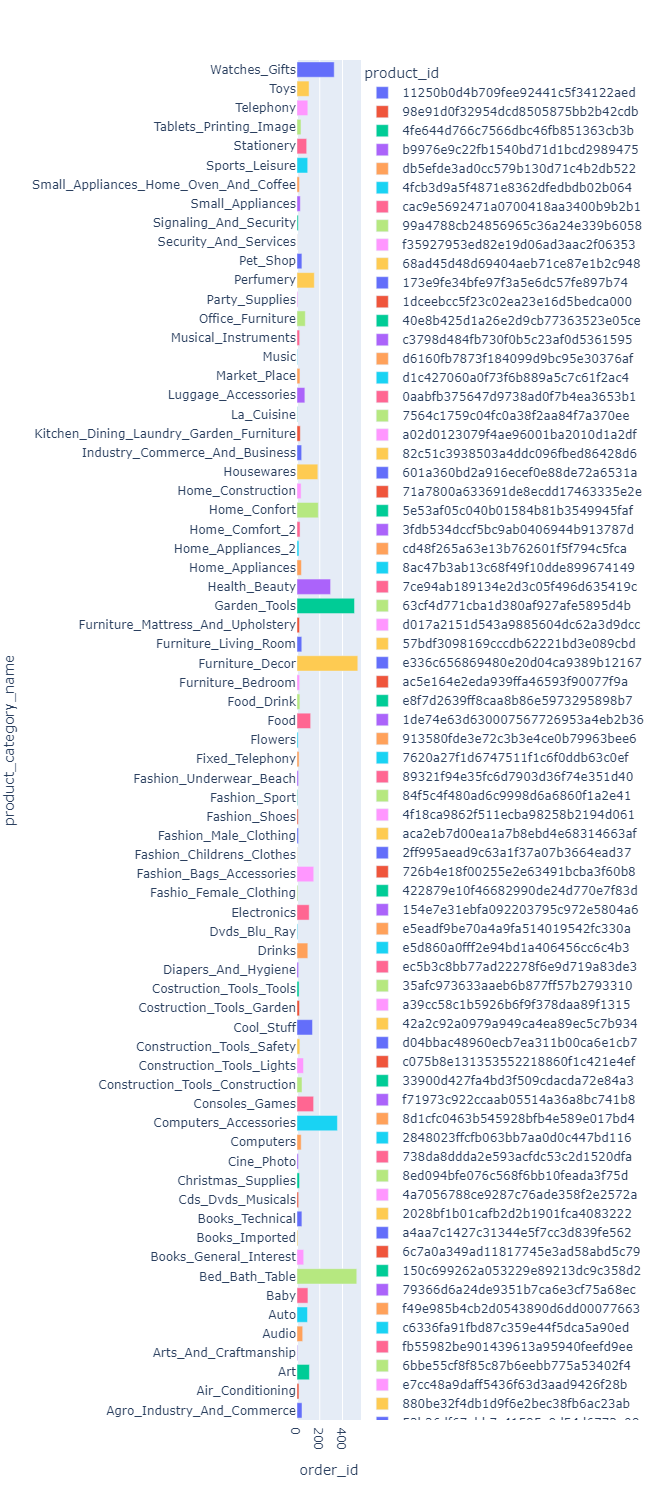

In [59]:
px.bar(category, y='product_category_name', x='order_id', color='product_id', height= 1500)

#### g. Popular categories by state, month

In [61]:
st_mon=data[['customer_state','product_category_name','order_id']].groupby(['customer_state','product_category_name']).aggregate('count').reset_index()
st_mon=st_mon.sort_values(['customer_state' ,'order_id'], ascending=[True, False]).drop_duplicates('customer_state')
st_mon

customer_state product_category_name  order_id
7        Andhra Pradesh        Bed_Bath_Table      7662
77    Arunachal Pradesh        Bed_Bath_Table       128
132        Chhattisgarh        Bed_Bath_Table       726
229               Delhi         Health_Beauty       334
255                 Goa                  Auto         1
272             Gujarat        Bed_Bath_Table       808
339             Haryana        Bed_Bath_Table       296
396    Himachal Pradesh        Bed_Bath_Table        85
448     Jammu & Kashmir        Bed_Bath_Table       178
505           Karnataka        Bed_Bath_Table       407
568              Kerala        Bed_Bath_Table       152
625      Madhya Pradesh        Bed_Bath_Table       339
691         Maharashtra        Bed_Bath_Table       220
750              Orissa        Bed_Bath_Table        82
825              Punjab         Health_Beauty        78
890           Rajasthan        Sports_Leisure        97
901          Tamil Nadu        Bed_Bath_Table       222
987       Uttar Pradesh         Health_Beauty       112
1014        Uttaranchal            Cool_Stuff        12
1056        West Bengal         Health_Beauty        45

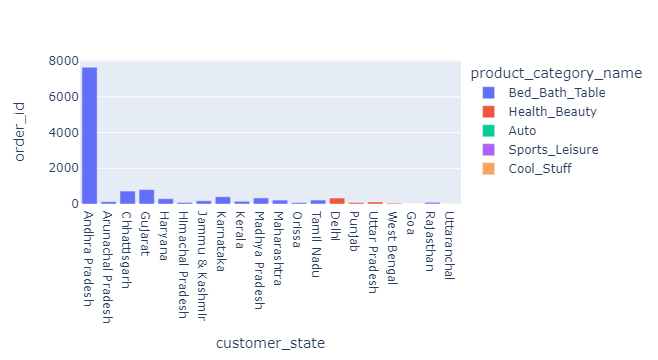

In [62]:
px.bar(st_mon, x='customer_state', color='product_category_name', y='order_id')

In [63]:
st_mon=data[['order_month','product_category_name','order_id']].groupby(['order_month','product_category_name']).aggregate('count').reset_index()
st_mon=st_mon.sort_values(['order_month' ,'order_id'], ascending=[True, False]).drop_duplicates('order_month')
st_mon

order_month                    product_category_name  order_id
0        2016-09                          Furniture_Decor         2
20       2016-10                          Furniture_Decor        80
33       2016-12                 Fashion_Bags_Accessories         1
55       2017-01                          Furniture_Decor       204
104      2017-02                          Furniture_Decor       283
154      2017-03                          Furniture_Decor       346
186      2017-04                           Bed_Bath_Table       309
245      2017-05                           Bed_Bath_Table       426
302      2017-06                           Bed_Bath_Table       431
362      2017-07                           Bed_Bath_Table       641
422      2017-08                           Bed_Bath_Table       565
485      2017-09                           Bed_Bath_Table       568
550      2017-10                           Bed_Bath_Table       611
613      2017-11                           Bed_Bath_Table      1027
678      2017-12                           Bed_Bath_Table       587
740      2018-01                           Bed_Bath_Table       911
812      2018-02                    Computers_Accessories      1021
869      2018-03                           Bed_Bath_Table       841
936      2018-04                           Bed_Bath_Table       770
1035     2018-05                            Health_Beauty       800
1098     2018-06                            Health_Beauty       900
1163     2018-07                            Health_Beauty       803
1227     2018-08                            Health_Beauty       872
1251     2018-09  Kitchen_Dining_Laundry_Garden_Furniture         1

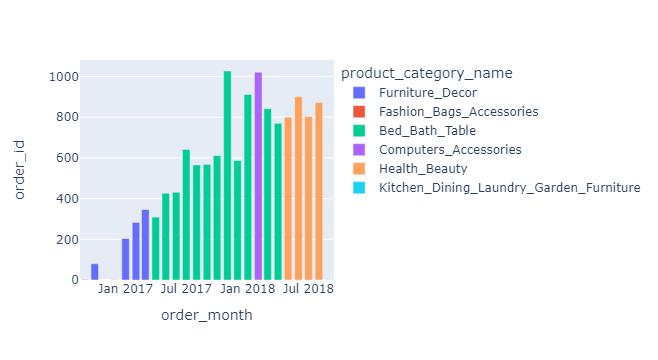

In [64]:
st_mon['order_month'] = st_mon['order_month'].astype(str)

px.bar(st_mon, x='order_month', color='product_category_name', y='order_id')

### h. List top 10 most expensive products sorted by price

In [66]:
u=data.groupby(data.product_category_name).price.sum().sort_values(ascending= False).reset_index().head(10)
u

product_category_name       price
0          Health_Beauty  1295017.44
1          Watches_Gifts  1251312.51
2         Bed_Bath_Table  1101963.55
3         Sports_Leisure  1024136.32
4  Computers_Accessories   947665.59
5        Furniture_Decor   768556.72
6             Housewares   665525.49
7             Cool_Stuff   661576.55
8                   Auto   616742.46
9           Garden_Tools   515229.07

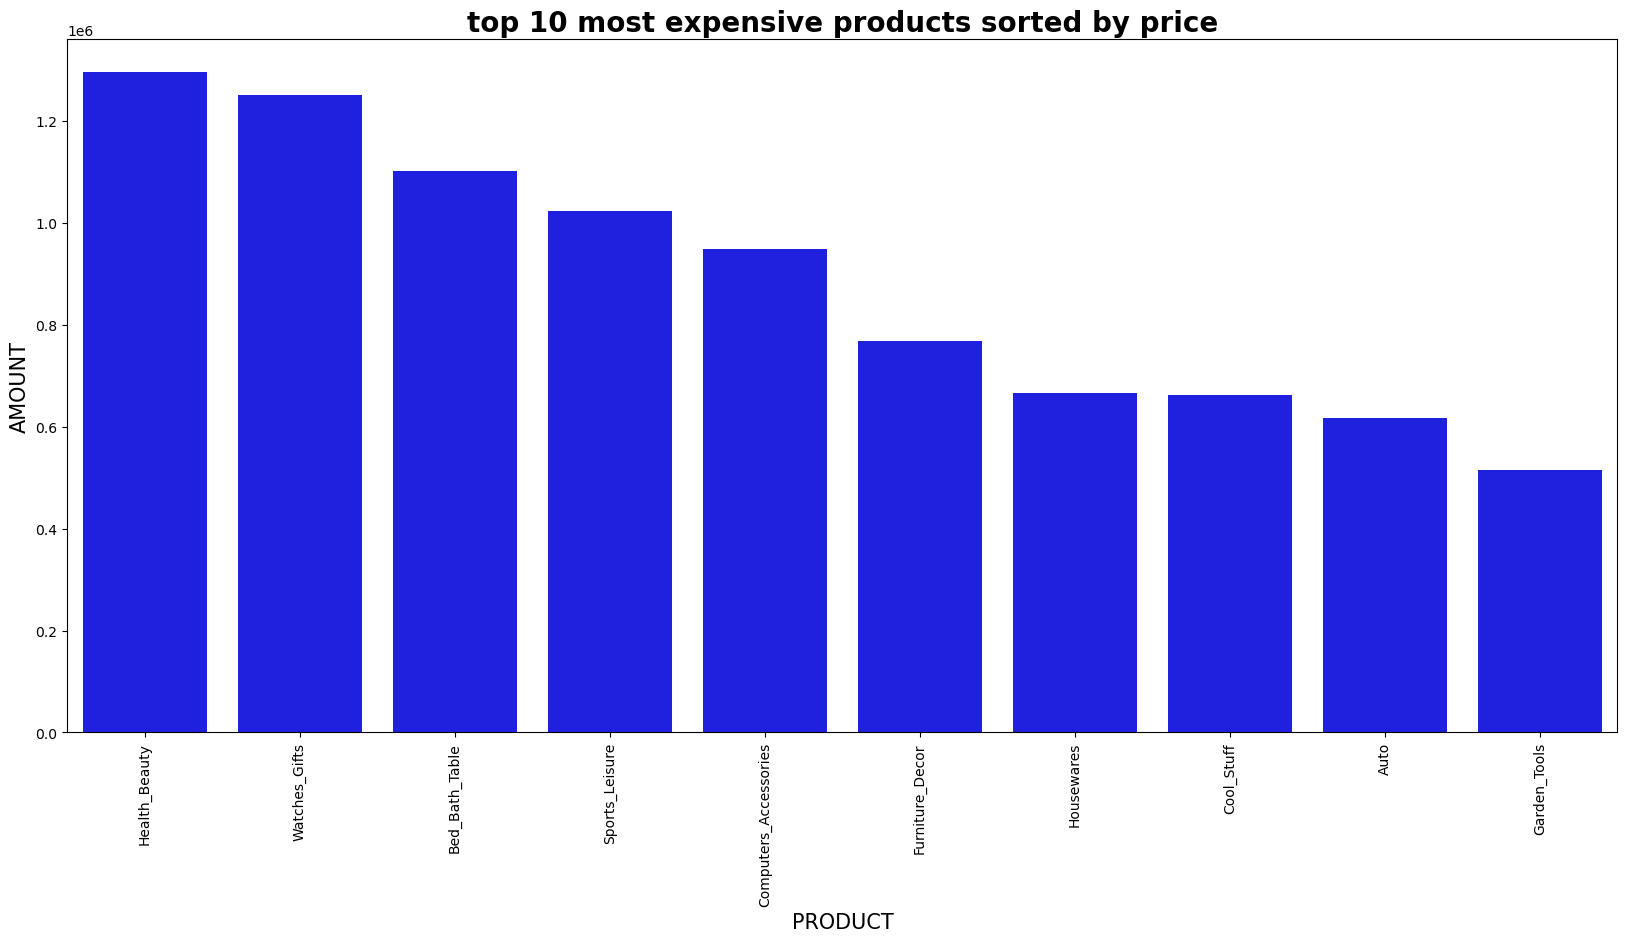

In [67]:
plt.figure(figsize=(20,9))
fig=sns.barplot(data=u, x='product_category_name', y='price', color='blue' )
plt.title('top 10 most expensive products sorted by price', fontweight='bold',fontsize=20)
plt.xlabel('PRODUCT',fontsize=15)
plt.ylabel('AMOUNT',fontsize=15)
plt.xticks(rotation=90)
plt.show()

#### 2. Performing Customers/sellers Segmentation¶
##### a. Divide the customers into groups based on the revenue generated

In [69]:
tr=data.groupby(by='customer_unique_id')[['payment_value']].sum().reset_index()
tr.rename(columns={'payment_value': 'total_revenue_per_customer'}, inplace=True)

In [70]:
# now merge the df tr and data on customer_id
data=pd.merge(left=data,right=tr, on='customer_unique_id',how='left')

In [71]:
# get idea of customer spend
print(data.total_revenue_per_customer.min())
print(data.total_revenue_per_customer.max())
print(data.total_revenue_per_customer.mean())

0.0
109312.64
383.4233892280284


In [72]:
# define segment of customer based on spend
data['customer_segment']=data.total_revenue_per_customer.apply(lambda x: 'high budget' if x>1000  else 'mid budget' if  (x>=500 ) else 'low budget' if (x>=1) else 'zero spend' )
cg=data.customer_segment.value_counts().reset_index()
cg

customer_segment   count
0       low budget  102067
1       mid budget    9028
2      high budget    7340
3       zero spend       2

Text(0, 0.5, 'Revenue')

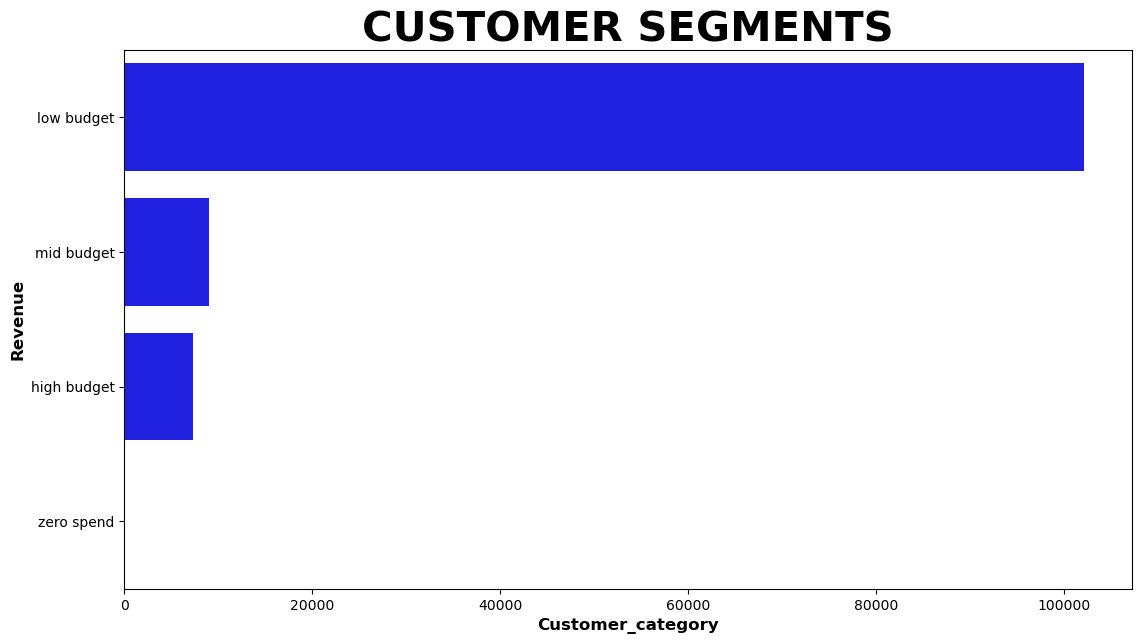

In [73]:
plt.figure(figsize=(13, 7))
fig=sns.barplot(data = cg, x= 'count', y='customer_segment', color='blue')
plt.title('CUSTOMER SEGMENTS', fontsize=30, fontweight='bold')
plt.xlabel("Customer_category" , fontsize=12, fontweight='bold')
plt.ylabel("Revenue" , fontsize=12, fontweight='bold')

#### b. Divide the sellers into groups based on the revenue generated

In [75]:
trs=data.groupby(data.seller_id).price.sum().reset_index()

In [76]:
trs.rename(columns={'price':'populer_prod_by_seller'}, inplace=True)

In [77]:
#now merge trs and data on seller id
data=pd.merge(left=data, right= trs, how='left', on='seller_id')

In [78]:
#try to get some idea od seller segment
print(data.populer_prod_by_seller.min())
print(data.populer_prod_by_seller.mean())
print(data.populer_prod_by_seller.max())

3.5
42587.82359453508
237695.75


In [79]:
data['seller_segment']=data.populer_prod_by_seller.apply(lambda x:  'best seller' if x>150000 else 'good seller' if (x>=50000) else 'bad seller' if (x>=20000) else 'worst seller')
sg=data.seller_segment.value_counts().reset_index()
sg

seller_segment  count
0   worst seller  67932
1     bad seller  21870
2    good seller  20825
3    best seller   7810

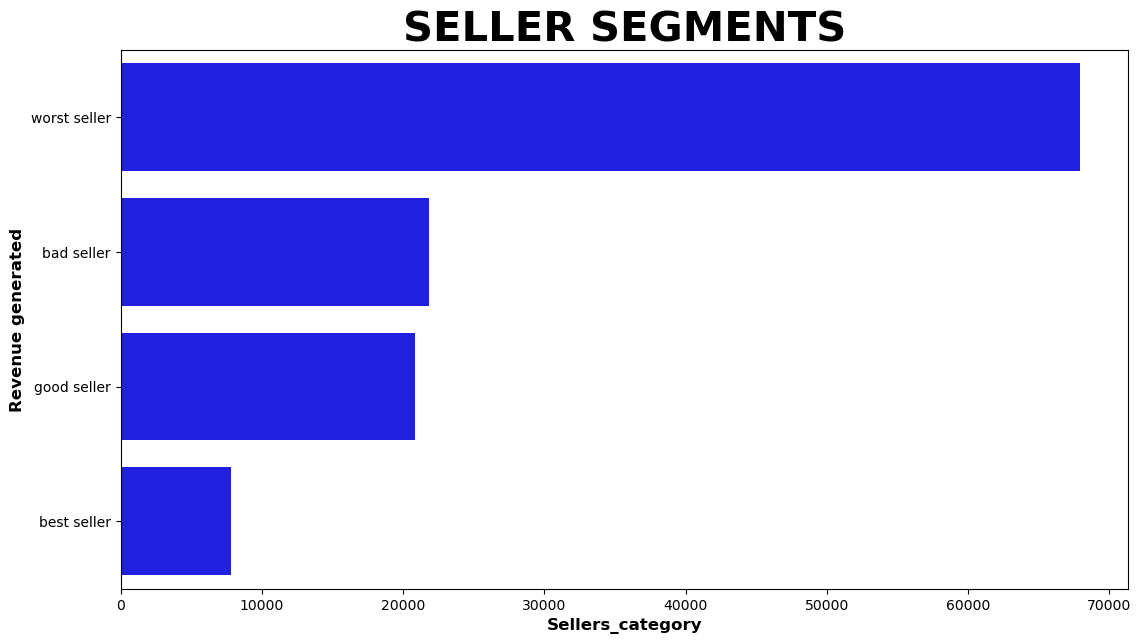

In [80]:
plt.figure(figsize=(13,7))
fig=sns.barplot(data= sg, x='count', y='seller_segment', color='blue')
plt.xlabel('Sellers_category', fontsize=12, fontweight='bold')
plt.ylabel('Revenue generated', fontsize= 12, fontweight='bold')
plt.title('SELLER SEGMENTS', fontsize=30, fontweight='bold')
plt.show()

#### 3. Cross-Selling (Which products are selling together)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118437 entries, 0 to 118436
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_id                    118437 non-null  object        
 1   customer_id                 118437 non-null  object        
 2   order_status                118437 non-null  object        
 3   order_purchase_timestamp    118437 non-null  datetime64[ns]
 4   payment_type                118437 non-null  object        
 5   payment_value               118437 non-null  float64       
 6   review_id                   118437 non-null  object        
 7   review_score                118437 non-null  int64         
 8   order_item_id               117623 non-null  float64       
 9   product_id                  117623 non-null  object        
 10  seller_id                   117623 non-null  object        
 11  price                       117623 non-

In [83]:
cross_selling = data[data.duplicated(['order_purchase_timestamp','customer_id'],keep=False)].sort_values(by='order_purchase_timestamp')                                                    
cross_selling = cross_selling.loc[:,['customer_id','order_purchase_timestamp','product_id' ]]

cross_selling.drop_duplicates(subset ="product_id" ,inplace=True)
cross_selling = cross_selling[cross_selling.duplicated(['order_purchase_timestamp','customer_id'],keep=False)].sort_values(by='order_purchase_timestamp').reset_index()                                                  
cross_selling.drop(columns = 'index',axis=1, inplace=True)

print('Products with same customer id and order purchase timestamp are cross selling')
cross_selling.set_index('customer_id').T

Products with same customer id and order purchase timestamp are cross selling


customer_id               08c5351a6aca1c1589a38f244edeee9d  \
order_purchase_timestamp               2016-09-04 21:15:00   
product_id                f293394c72c9b5fafd7023301fc21fc2   

customer_id               08c5351a6aca1c1589a38f244edeee9d  \
order_purchase_timestamp               2016-09-04 21:15:00   
product_id                c1488892604e4ba5cff5b4eb4d595400   

customer_id               a0f95ab56c6d3a5ba0036b7fdfeda07f  \
order_purchase_timestamp               2016-10-04 15:02:00   
product_id                79938780eb7ffb7289f59a9a283bc06b   

customer_id               a0f95ab56c6d3a5ba0036b7fdfeda07f  \
order_purchase_timestamp               2016-10-04 15:02:00   
product_id                8f1e43e0e3374ed8c84df748034d6179   

customer_id               00474d2582fd72663036795b7ab8cfc1  \
order_purchase_timestamp               2016-10-04 22:33:00   
product_id                dc82d7e8f99966cb4c641f7ea5590eaf   

customer_id               00474d2582fd72663036795b7ab8cfc1  \
order_purchase_timestamp               2016-10-04 22:33:00   
product_id                35bd74b6319ba18ae4f30d8b54144fd2   

customer_id               3f6f000d5b0a959f38481fad4ab7cac2  \
order_purchase_timestamp               2016-10-04 23:59:00   
product_id                d48e56be99464cbf285a9da17f618165   

customer_id               3f6f000d5b0a959f38481fad4ab7cac2  \
order_purchase_timestamp               2016-10-04 23:59:00   
product_id                48a12f318432c4b6a1fdfd5d79372e66   

customer_id               3f6f000d5b0a959f38481fad4ab7cac2  \
order_purchase_timestamp               2016-10-04 23:59:00   
product_id                fd440fd792fd8a4b681f1eb258c25445   

customer_id               3f6f000d5b0a959f38481fad4ab7cac2  ...  \
order_purchase_timestamp               2016-10-04 23:59:00  ...   
product_id                66e08854f9319c6aa4874ca435598331  ...   

customer_id               a2e1b81e95b64a49c8715043ec2bf878  \
order_purchase_timestamp               2018-08-25 16:48:00   
product_id                44b6fc0101a9341e43ad3342a51ef75b   

customer_id               a2e1b81e95b64a49c8715043ec2bf878  \
order_purchase_timestamp               2018-08-25 16:48:00   
product_id                6fb9118651534879ecb3654b56a48a4c   

customer_id               9c7d3c254f40add7cec20a8f59f8699a  \
order_purchase_timestamp               2018-08-25 22:29:00   
product_id                494e28e86f2b12df2d95e9d55266ef4a   

customer_id               9c7d3c254f40add7cec20a8f59f8699a  \
order_purchase_timestamp               2018-08-25 22:29:00   
product_id                fcf311603fa276d415c006188e7bd070   

customer_id               02ae654741ad895368bd9ffc371893e5  \
order_purchase_timestamp               2018-08-26 08:40:00   
product_id                c9676685ee3aec26dd274549d54b85f6   

customer_id               02ae654741ad895368bd9ffc371893e5  \
order_purchase_timestamp               2018-08-26 08:40:00   
product_id                a1b35ee994b8c571119976c30aa07efe   

customer_id               e5a8aaccb766e00177b0a587979cc814  \
order_purchase_timestamp               2018-08-26 11:44:00   
product_id                3af5874bd2429ed183a5445d1432fcde   

customer_id               e5a8aaccb766e00177b0a587979cc814  \
order_purchase_timestamp               2018-08-26 11:44:00   
product_id                df4bcf4a328103951507064660c445e9   

customer_id               c24bbeb8111fea27eab791a37e665210  \
order_purchase_timestamp               2018-08-27 12:39:00   
product_id                b6b220a6c539cb65be34eed6fea8fe63   

customer_id               c24bbeb8111fea27eab791a37e665210  
order_purchase_timestamp               2018-08-27 12:39:00  
product_id                8cf22b2cc9465d64474a09853b62f5b2  

[2 rows x 3319 columns]

#### 4. Payment Behaviour

##### a. How customers are paying?

In [86]:
payment_behavior = data['payment_type'].value_counts().reset_index()
payment_behavior.columns = ['payment_type', 'count']
payment_behavior['percentage'] = ((payment_behavior['count'] / payment_behavior['count'].sum()) * 100).round(2)
payment_behavior

payment_type  count  percentage
0  credit_card  87761       74.10
1          UPI  23190       19.58
2      voucher   5777        4.88
3   debit_card   1706        1.44
4  not_defined      3        0.00

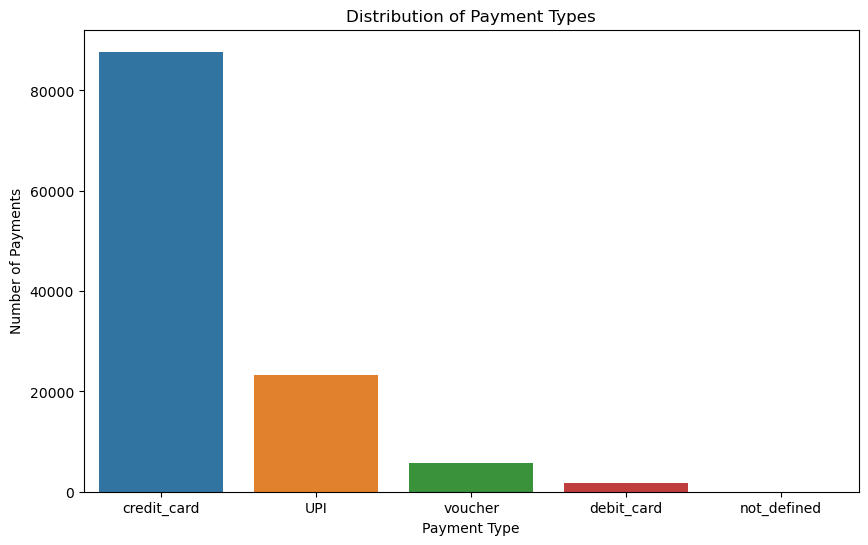

In [87]:
# Visualize the payment behavior
plt.figure(figsize=(10, 6))
sns.barplot(x='payment_type', y='count', data=payment_behavior)
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Payments')
plt.show()


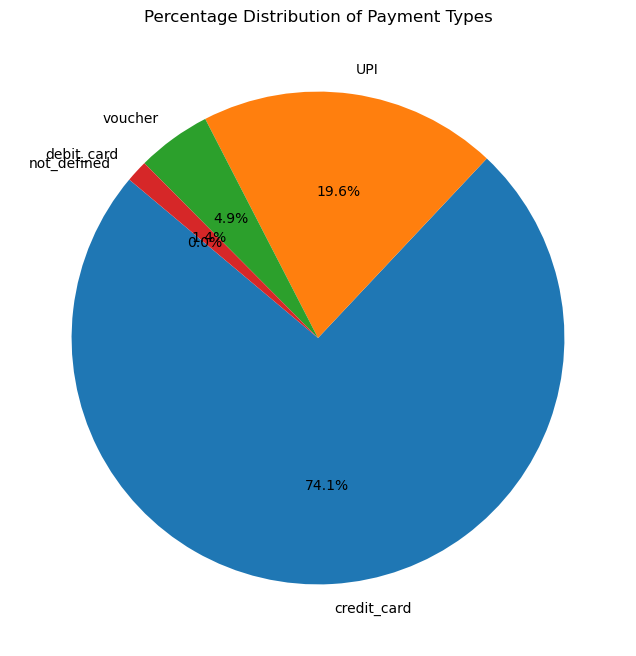

In [88]:
plt.figure(figsize=(8, 8))
plt.pie(payment_behavior['count'], labels=payment_behavior['payment_type'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Payment Types')
plt.show()

#### b. Which payment channels are used by most customers?

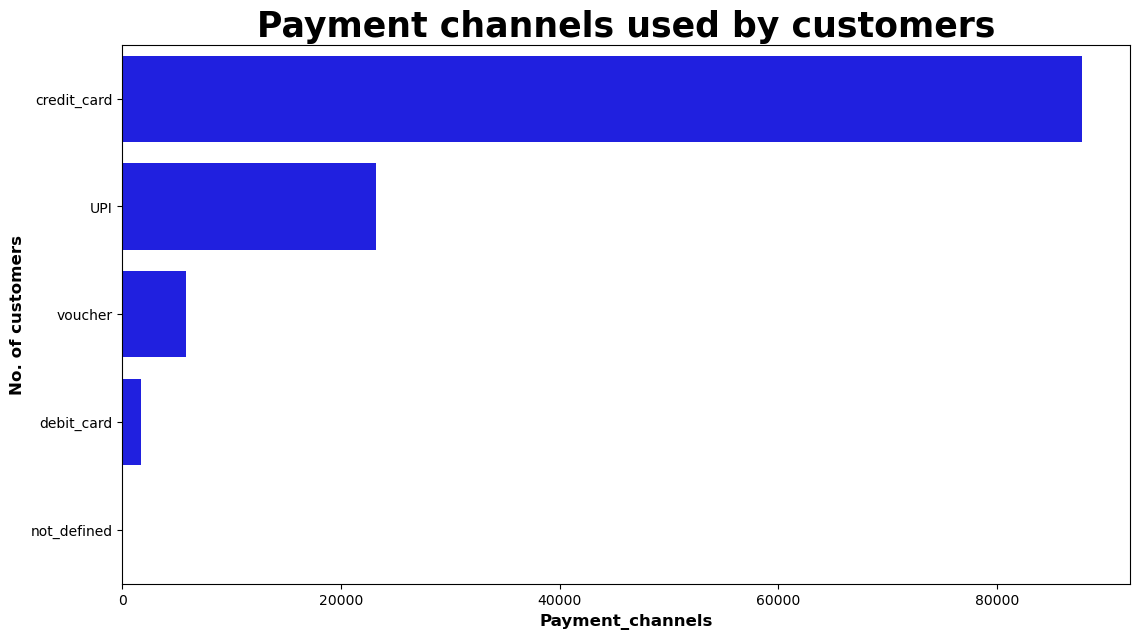

In [90]:
plt.figure(figsize=(13,7))
fig=sns.barplot(data=payment_behavior, x= 'count', y='payment_type', color='blue')
plt.xlabel("Payment_channels", fontsize=12, fontweight= 'bold')
plt.ylabel("No. of customers", fontsize=12, fontweight= 'bold')
plt.title('Payment channels used by customers', fontsize=25, fontweight='bold')
plt.show()

### From The above Graph we conclude that the mot of the customer is using Credit Card For the payment 

#### 5. Customer satisfaction towards category & product

#### a. Which categories (top 10) are maximum rated & minimum rated?

In [94]:
# Calculate the average rating for each category
category_ratings = data.groupby('product_category_name')['review_score'].mean().reset_index()
category_ratings.columns = ['product_category_name', 'average_rating']

# Sort categories by average rating
top_10_max_rated = category_ratings.sort_values(by='average_rating', ascending=False).head(10)
print("Top 10 Maximum Rated Categories:")
top_10_max_rated.reset_index().drop('index',axis=1)

Top 10 Maximum Rated Categories:


product_category_name  average_rating
0                      Cds_Dvds_Musicals        4.642857
1              Fashion_Childrens_Clothes        4.500000
2                 Books_General_Interest        4.431858
3                         Books_Imported        4.419355
4                        Books_Technical        4.345588
5                Costruction_Tools_Tools        4.333333
6  Small_Appliances_Home_Oven_And_Coffee        4.320513
7                             Food_Drink        4.307958
8                    Luggage_Accessories        4.290799
9                          Fashion_Sport        4.258065

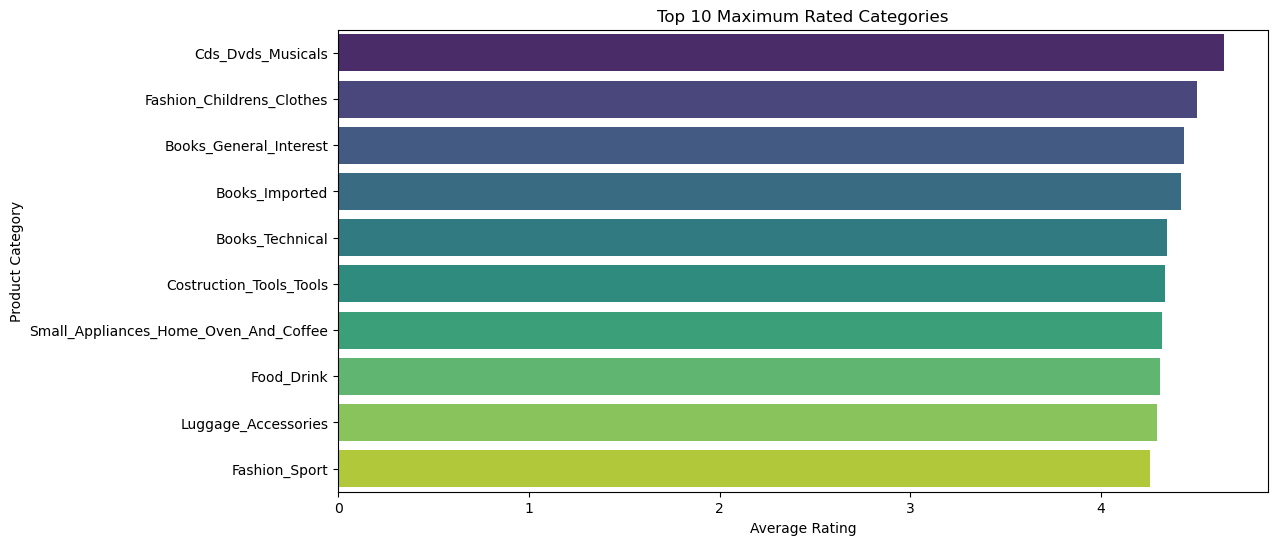

In [95]:
# Plotting top 10 maximum rated categories
plt.figure(figsize=(12, 6))
sns.barplot(x='average_rating', y='product_category_name', data=top_10_max_rated, palette='viridis')
plt.title('Top 10 Maximum Rated Categories')
plt.xlabel('Average Rating')
plt.ylabel('Product Category')
plt.show()

In [96]:
# Sort categories by average rating
top_10_min_rated = category_ratings.sort_values(by='average_rating').head(10)
print("\nTop 10 Minimum Rated Categories:")
top_10_min_rated.reset_index().drop('index',axis=1)


Top 10 Minimum Rated Categories:


product_category_name  average_rating
0              Security_And_Services        2.500000
1                Diapers_And_Hygiene        3.256410
2                     Home_Comfort_2        3.387097
3                   Office_Furniture        3.508742
4              Fashion_Male_Clothing        3.528169
5                    Fixed_Telephony        3.661765
6             Fashio_Female_Clothing        3.780000
7                     Party_Supplies        3.795455
8  Furniture_Mattress_And_Upholstery        3.804878
9                              Audio        3.817942

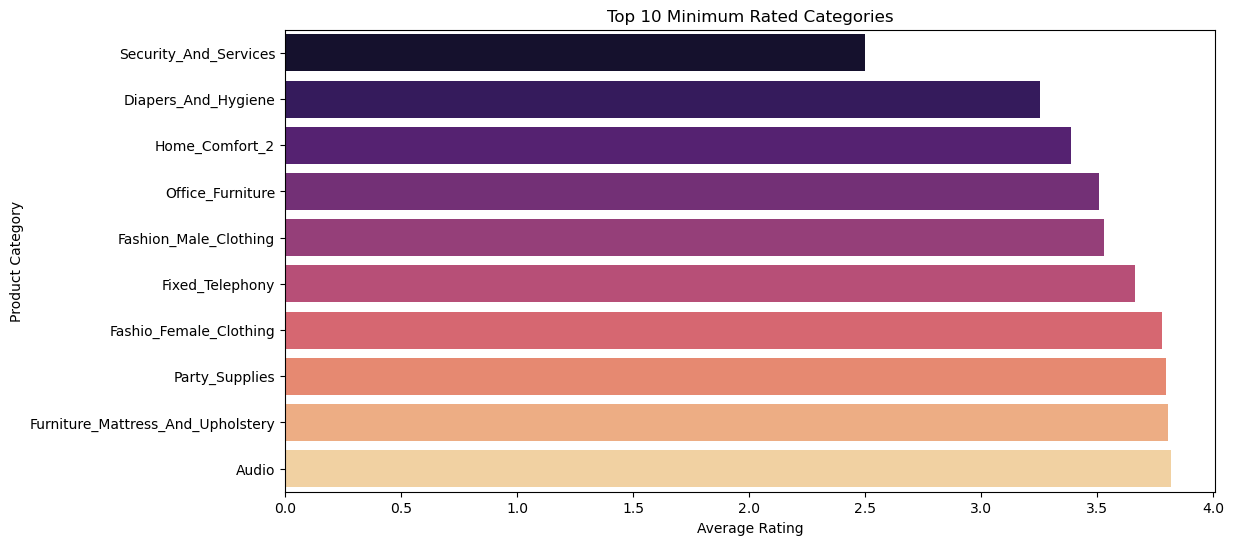

In [97]:
plt.figure(figsize=(12, 6))
sns.barplot(x='average_rating', y='product_category_name', data=top_10_min_rated, palette='magma')
plt.title('Top 10 Minimum Rated Categories')
plt.xlabel('Average Rating')
plt.ylabel('Product Category')
plt.show()

#### b. Which products (top10) are maximum rated & minimum rated?

In [99]:
# Calculate the average rating for each product
product_ratings = data.groupby('product_id')['review_score'].mean().reset_index()
product_ratings.columns = ['product_id', 'average_rating']

# Sort products by average rating
top_10_max_rated_products = product_ratings.sort_values(by='average_rating', ascending=False).head(10)
print("Top 10 Maximum Rated Products:")
top_10_max_rated_products.reset_index().drop('index',axis=1)

Top 10 Maximum Rated Products:


product_id  average_rating
0  00066f42aeeb9f3007548bb9d3f33c38             5.0
1  86743ff92eee3d16b7df59cddd583b8c             5.0
2  868ceb027ab706a4dee42e2220006b85             5.0
3  868969d3a93aeeab7bfcd4fc3d3d65de             5.0
4  868766ed2172644fdd977d6bd395a107             5.0
5  8684bd8f93b4f4038d07188a23811e93             5.0
6  867c96d2bb67aba6500a4c509cf76072             5.0
7  867b820367ec206b38a357f2c12454b7             5.0
8  867901d7e8488fb97f1fb538c09d476e             5.0
9  865bfa00c1dad8f4146d3c2765f051ca             5.0

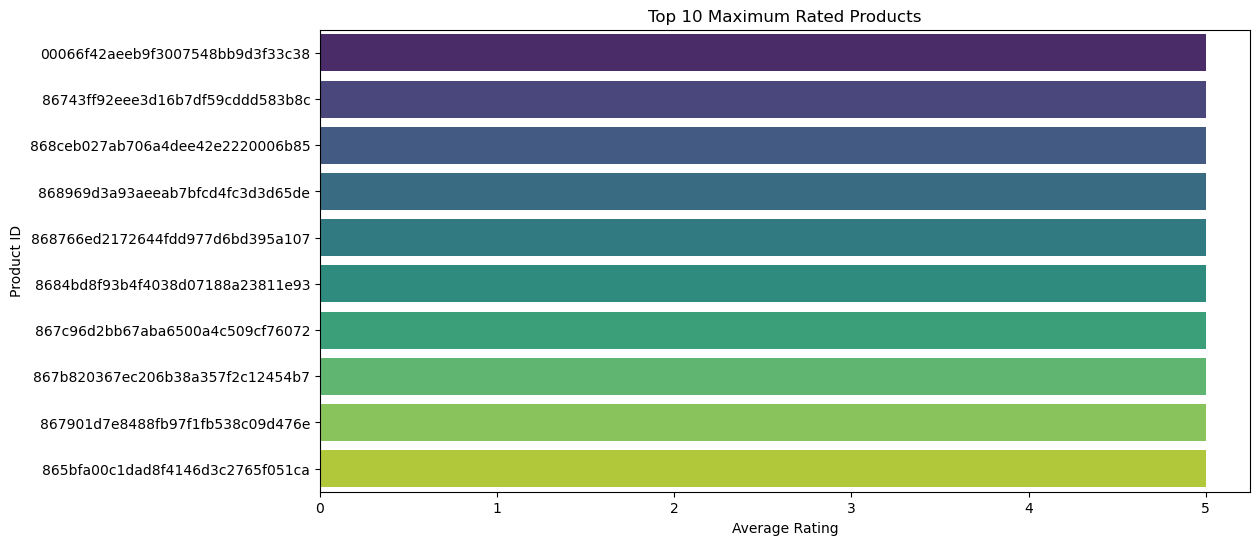

In [100]:
# Plotting top 10 maximum rated products
plt.figure(figsize=(12, 6))
sns.barplot(x='average_rating', y='product_id', data=top_10_max_rated_products, palette='viridis')
plt.title('Top 10 Maximum Rated Products')
plt.xlabel('Average Rating')
plt.ylabel('Product ID')
plt.show()

In [101]:
top_10_min_rated_products = product_ratings.sort_values(by='average_rating').head(10)
print("\nTop 10 Minimum Rated Products:")
top_10_min_rated_products.reset_index().drop('index',axis=1)


Top 10 Minimum Rated Products:


product_id  average_rating
0  592cc6634d2c783d297effc0b828bc37             1.0
1  482c25dc8512547962854dfff5ac057b             1.0
2  e10c5041c0752194622a7a7016d8c9b5             1.0
3  47fafa6908e75ae62b8a36a9eb3b9234             1.0
4  47d85e3e35a3e29f93fdc12b295d520c             1.0
5  47d6209a0b169cc800b0a45a9127d2f2             1.0
6  47cad419b0ad5dc9d2305bf795c3c16f             1.0
7  47b49b876c60eafde72f0e1c602f386d             1.0
8  47b0f8596ee6dafbb4438cac16fa6275             1.0
9  47ac4dcdb04867daeaad647d224389e4             1.0

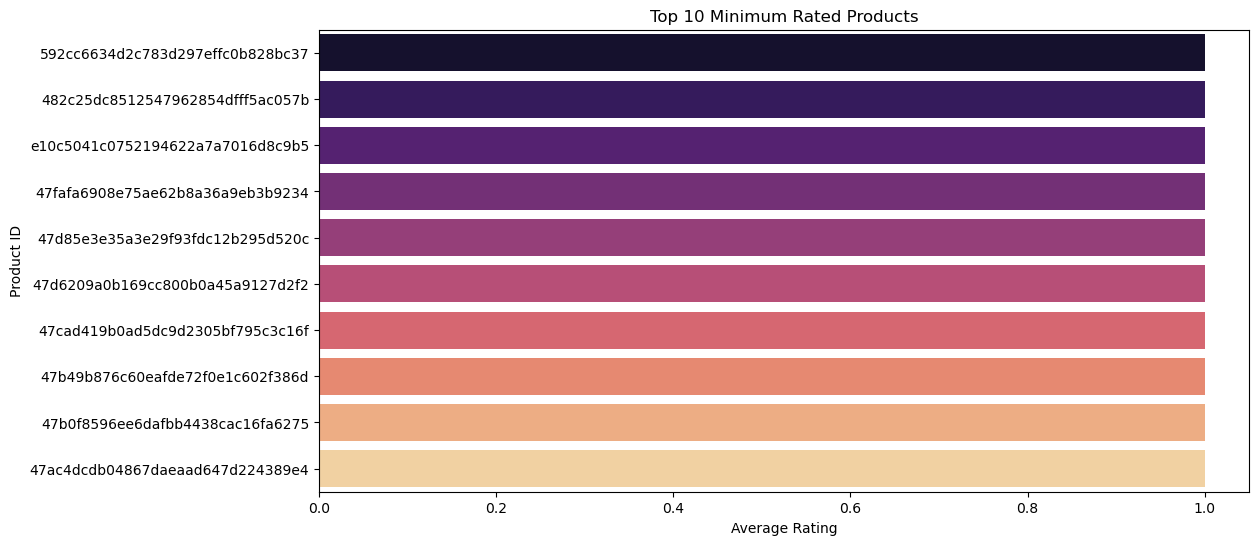

In [102]:
plt.figure(figsize=(12, 6))
sns.barplot(x='average_rating', y='product_id', data=top_10_min_rated_products, palette='magma')
plt.title('Top 10 Minimum Rated Products')
plt.xlabel('Average Rating')
plt.ylabel('Product ID')
plt.show()

#### c. Average rating by location, seller, product, category, month etc.

In [104]:
# Average rating by location (customer city)
avg_rating_by_location = data.groupby('customer_city')['review_score'].mean().reset_index()
avg_rating_by_location.columns = ['customer_city', 'average_rating']
print("Average Rating by Location:")
avg_rating_by_location.head()

Average Rating by Location:


customer_city  average_rating
0     Aadityana        3.878788
1  Aambaliyasan        3.500000
2     Aantaliya        3.886792
3    Aarambhada        3.596154
4      Abiramam        5.000000

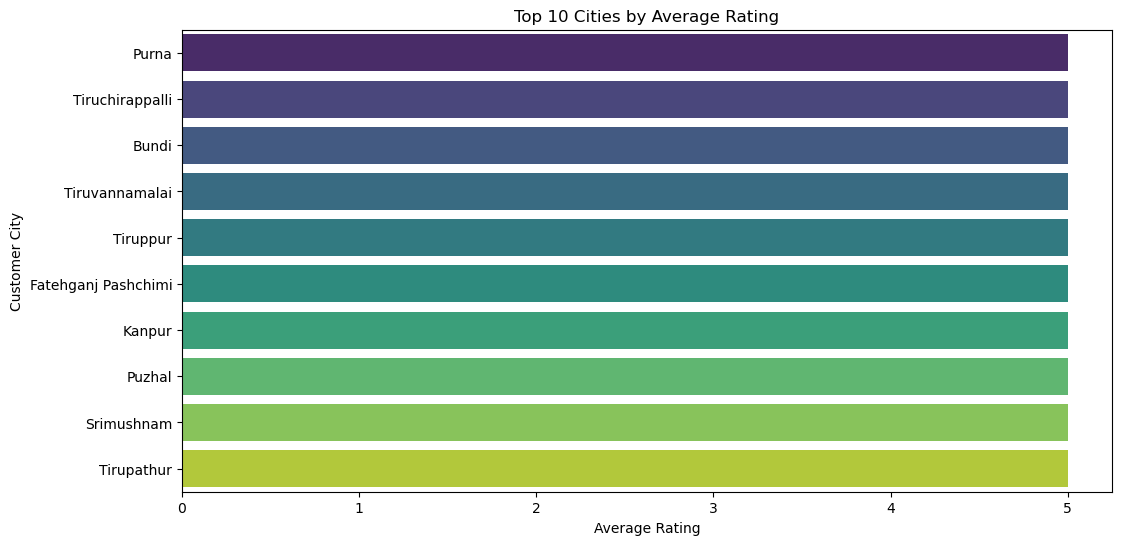

In [105]:
# Plotting average rating by location
plt.figure(figsize=(12, 6))
sns.barplot(x='average_rating', y='customer_city', data=avg_rating_by_location.sort_values(by='average_rating', ascending=False).head(10), palette='viridis')
plt.title('Top 10 Cities by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Customer City')
plt.show()

In [106]:
# Average rating by seller
avg_rating_by_seller = data.groupby('seller_id')['review_score'].mean().reset_index()
avg_rating_by_seller.columns = ['seller_id', 'average_rating']
print("\nAverage Rating by Selle`r:")
avg_rating_by_seller


Average Rating by Selle`r:


seller_id  average_rating
0     0015a82c2db000af6aaaf3ae2ecb0532        3.666667
1     001cca7ae9ae17fb1caed9dfb1094831        3.883817
2     001e6ad469a905060d959994f1b41e4f        1.000000
3     002100f778ceb8431b7a1020ff7ab48f        4.033898
4     003554e2dce176b5555353e4f3555ac8        5.000000
...                                ...             ...
3090  ffcfefa19b08742c5d315f2791395ee5        1.000000
3091  ffdd9f82b9a447f6f8d4b91554cc7dd3        4.285714
3092  ffeee66ac5d5a62fe688b9d26f83f534        4.214286
3093  fffd5413c0700ac820c7069d66d98c89        3.838710
3094  ffff564a4f9085cd26170f4732393726        2.100000

[3095 rows x 2 columns]

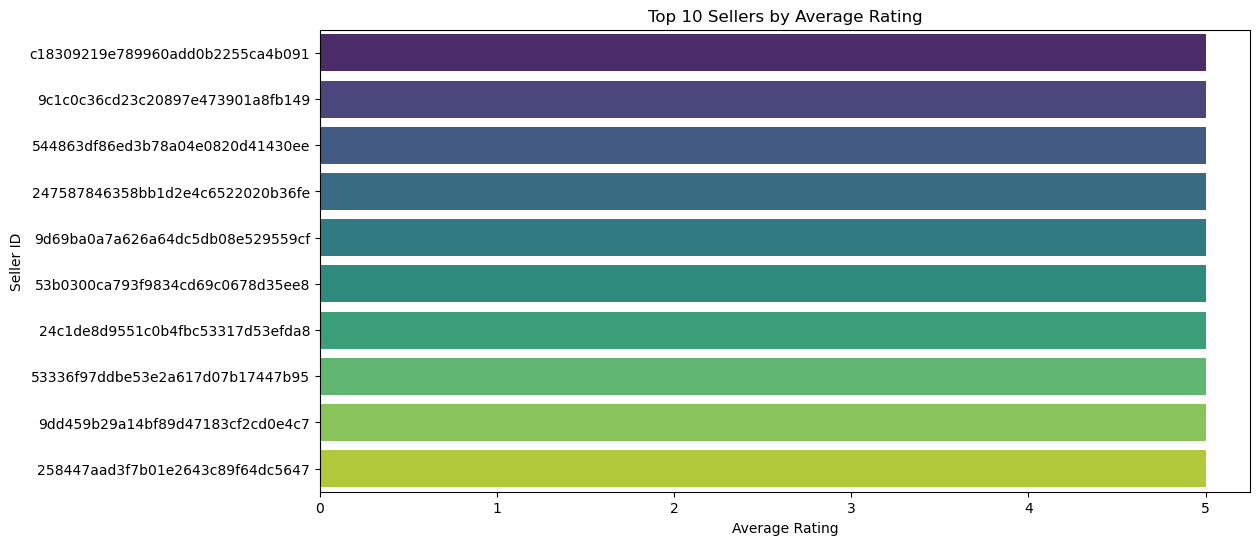

In [107]:
# Plotting average rating by seller
plt.figure(figsize=(12, 6))
sns.barplot(x='average_rating', y='seller_id', data=avg_rating_by_seller.sort_values(by='average_rating', ascending=False).head(10), palette='viridis')
plt.title('Top 10 Sellers by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Seller ID')
plt.show()


In [108]:
# Average rating by product
avg_rating_by_product = data.groupby('product_id')['review_score'].mean().reset_index()
avg_rating_by_product.columns = ['product_id', 'average_rating']
print("\nAverage Rating by Product:")
avg_rating_by_product.head()



Average Rating by Product:


product_id  average_rating
0  00066f42aeeb9f3007548bb9d3f33c38             5.0
1  00088930e925c41fd95ebfe695fd2655             4.0
2  0009406fd7479715e4bef61dd91f2462             1.0
3  000b8f95fcb9e0096488278317764d19             5.0
4  000d9be29b5207b54e86aa1b1ac54872             5.0

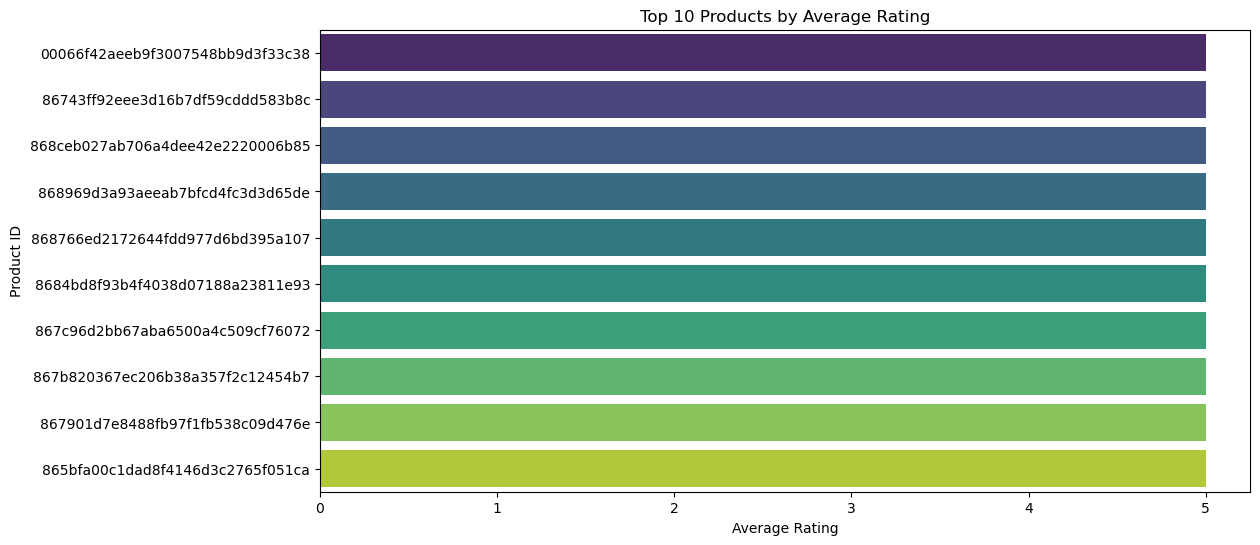

In [109]:
# Plotting average rating by product
plt.figure(figsize=(12, 6))
sns.barplot(x='average_rating', y='product_id', data=avg_rating_by_product.sort_values(by='average_rating', ascending=False).head(10), palette='viridis')
plt.title('Top 10 Products by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Product ID')
plt.show()

In [110]:
# Average rating by category
avg_rating_by_category = data.groupby('product_category_name')['review_score'].mean().reset_index()
avg_rating_by_category.columns = ['product_category_name', 'average_rating']
print("\nAverage Rating by Category:")
avg_rating_by_category.head()



Average Rating by Category:


product_category_name  average_rating
0  Agro_Industry_And_Commerce        4.140562
1            Air_Conditioning        3.920530
2                         Art        3.917808
3       Arts_And_Craftmanship        4.125000
4                       Audio        3.817942

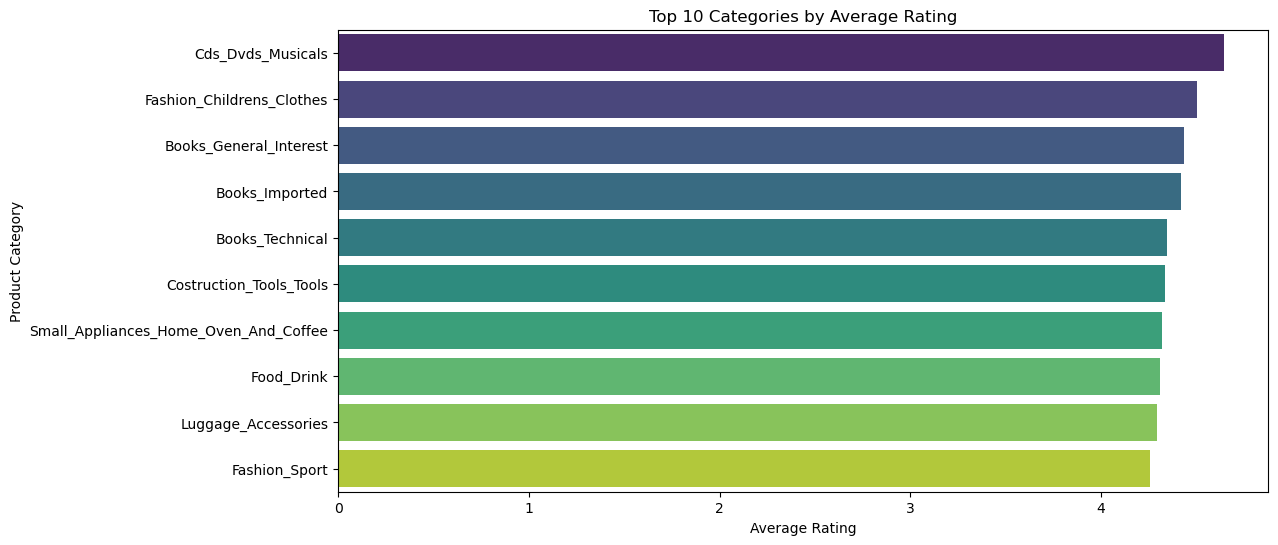

In [111]:
# Plotting average rating by category
plt.figure(figsize=(12, 6))
sns.barplot(x='average_rating', y='product_category_name', data=avg_rating_by_category.sort_values(by='average_rating', ascending=False).head(10), palette='viridis')
plt.title('Top 10 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Product Category')
plt.show()

In [112]:
# Average rating by month
avg_rating_by_month = data.groupby('order_month')['review_score'].mean().reset_index()
avg_rating_by_month.columns = ['order_month', 'average_rating']

print("\nAverage Rating by Month:")
avg_rating_by_month.head()


Average Rating by Month:


order_month  average_rating
0     2016-09        1.000000
1     2016-10        3.491272
2     2016-12        5.000000
3     2017-01        4.063107
4     2017-02        3.980495

C:\Users\ashut\AppData\Local\Temp\ipykernel_6692\1909137928.py:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\ashut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\ashut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



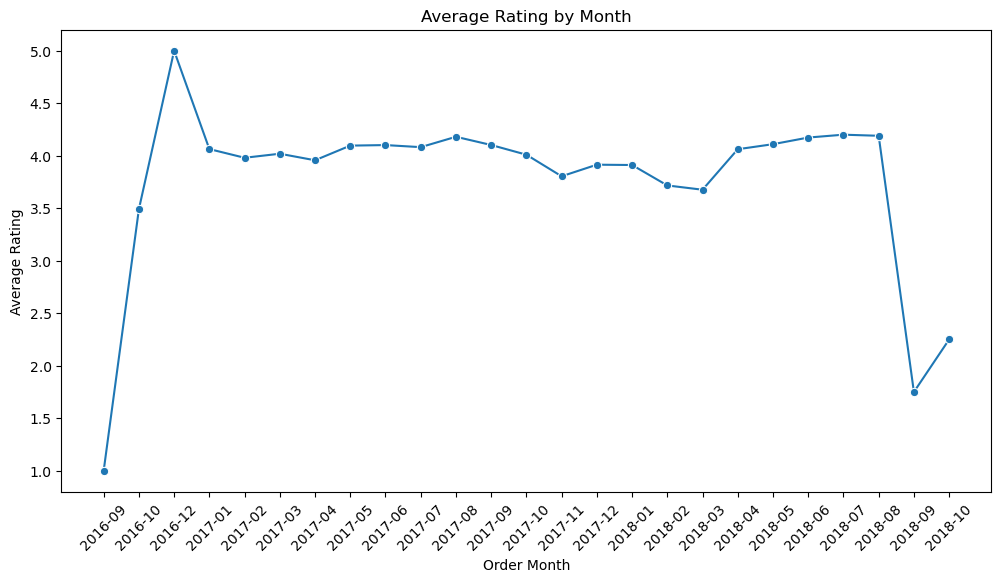

In [113]:
avg_rating_by_month['order_month'] = avg_rating_by_month['order_month'].astype('str')
# Plotting average rating by month
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_rating_by_month,x='order_month', y='average_rating',  marker='o', palette='viridis')
plt.title('Average Rating by Month')
plt.xlabel('Order Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()